# Progetto Visualizzazione Scientifica
### Autori 
Simone Alessandro Casciaro 987303<br>
Michela Francesca Firrera 02022A

### Scaletta
- Introduzione
    - 1 slide su spiegazione di cos'è un GP --> 
        - Abbreviazione  Gran Premio
        - Durata  Intero weekend di gara (Venerdì, Sabato e Domenica).
        - Campionato di Formula 1  Molteplici GP.
        - Composizione  Prove Libere, Qualifiche e Gara.
        - Ogni Gran Premio viene corso in una pista diversa, quasi sempre di paesi diversi!
    - Chi ha vinto più GP? (Piloti e Costruttori)
    - Distribuzione delle vittorie e delle migliori squadre (Ferrari, McLaren, Mercedes, Williams, Red Bull)
- Com'è strutturato un GP?
    - Slide che mostra il format classico: FP1, FP2, FP3, Q1, Q2, Q3 e R
- Inizio Analisi GP (CoTA)
    - Studio delle FP1
    - Studio delle FP2
    - Studio delle FP3
        ...
- Introduzione format alternativo
    - Slide che mostra il format Sprint: FP1, Q1, Q2, Q3, SQ1, SQ2, SQ3, SR, R
    - Come cambia l'analisi di un GP nei format Sprint?
        ...
- Domande finali
    - Troveremo domande in corso d'opera alla quale rispondere con ulteriori grafici
- Conclusione

### Fonti
- Dataset http://ergast.com/mrd/
- Stile Grafici https://docs.fastf1.dev/plotting.html
- Telemetrie https://docs.fastf1.dev/core.html

# Inizio Analisi GP (CoTA)

### Apertura Sessioni

In [2]:
import fastf1 as f1

FP = f1.get_session(2023, 'Austin', 1) # Free Practice
Q = f1.get_session(2023, 'Austin', 2) # Qualifying
SQ = f1.get_session(2023, 'Austin', 3) # Sprint Shootout
SR = f1.get_session(2023, 'Austin', 4) # Sprint Race
R = f1.get_session(2023, 'Austin', 5) # Race

# Loading Sessions
FP.load()
Q.load()
SQ.load()
SR.load()
R.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\Simone\AppData\Local\Temp\fastf1.
	Size: 359.86 MB
core           INFO 	Loading data for United States Grand Prix - Practice 1 [v3.1.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55

### Import Librerie

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import fastf1.plotting as f1plt
import fastf1.utils as f1u
import pandas as pd
from timple.timedelta import strftimedelta
from timple.timedelta import num2timedelta
from fastf1.core import Laps

f1plt.setup_mpl()

plt.rc('figure', figsize=(15.0, 10.0))

### Track Map

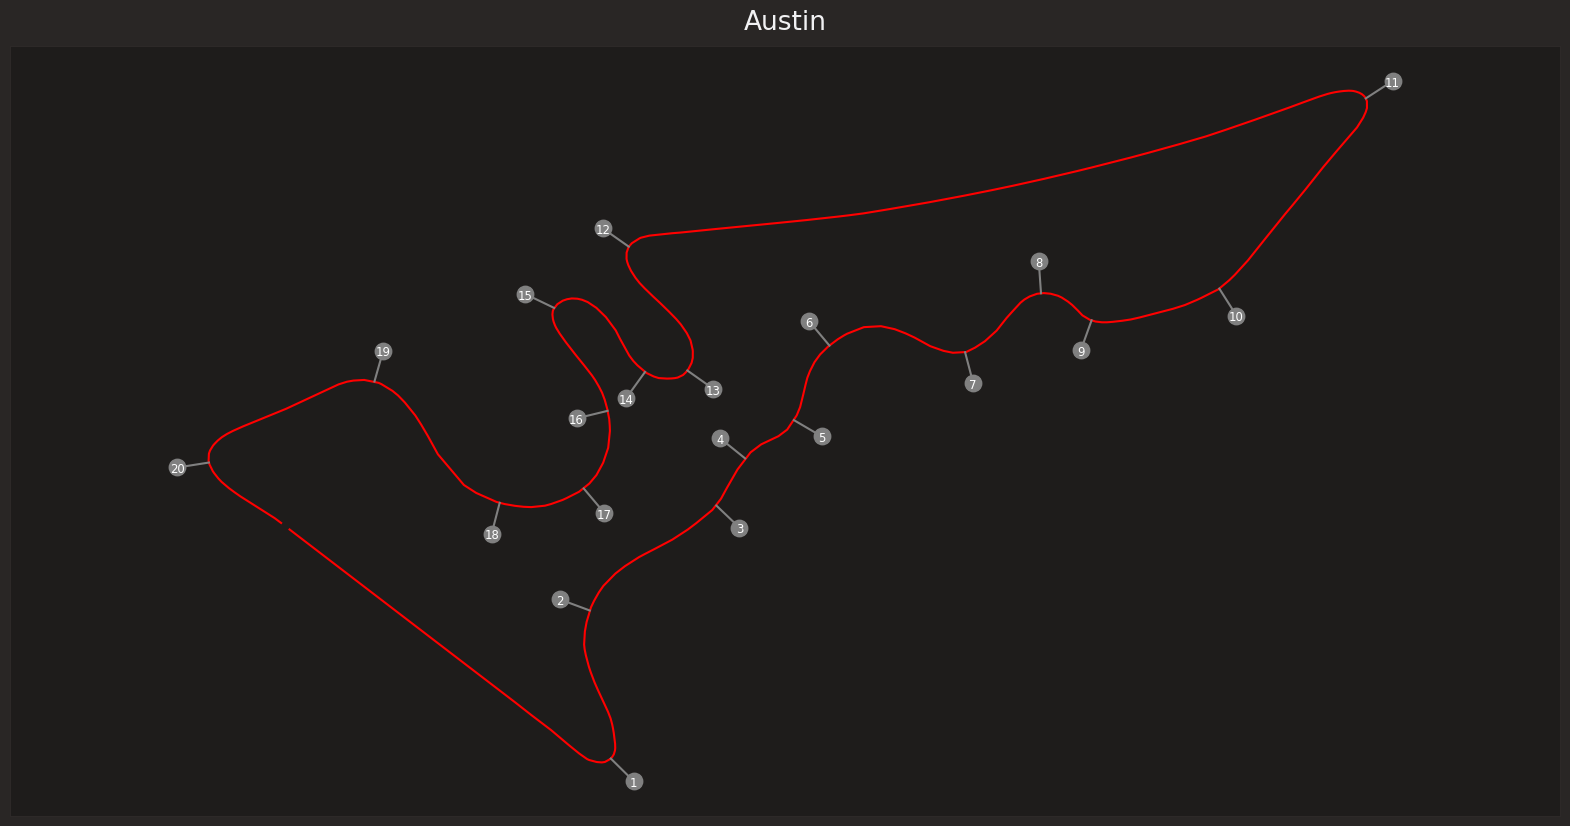

In [4]:
plt.rc('figure', figsize=(20.0, 10.0))

lap = Q.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = Q.get_circuit_info()

# ---

def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

# ---

# Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1], color = 'red')

# ---

offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')
    
# ---

plt.title(Q.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

### Free Practice

In [5]:
plt.rc('figure', figsize=(15.0, 10.0))

C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered depr

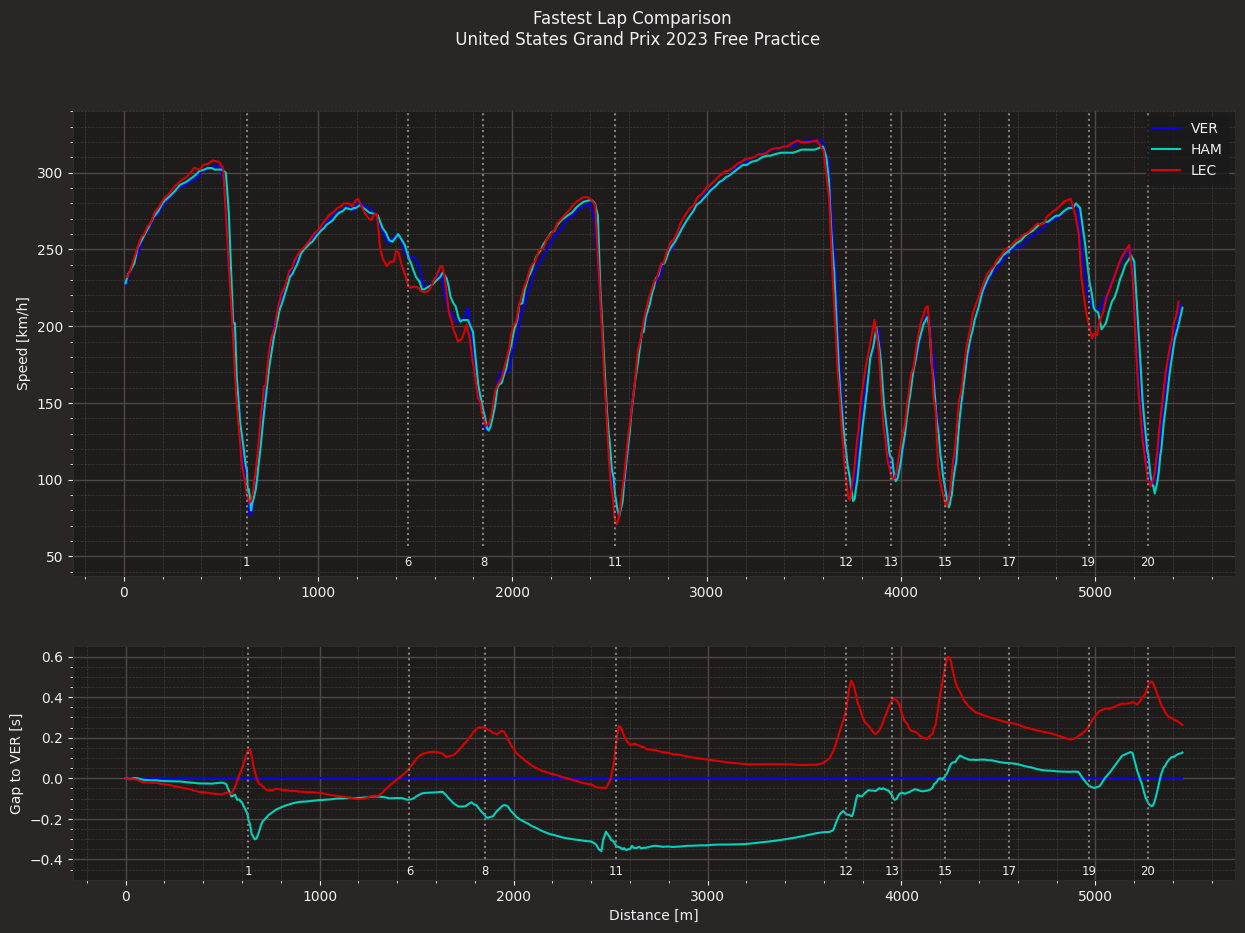

In [6]:
# Let's compare Verstappen (1:35.912), Hamilton (1:36.068) and Leclerc (1:36.193)

# Data for Plot 1
ver_lap = FP.laps.pick_driver('VER').pick_fastest()
ham_lap = FP.laps.pick_driver('HAM').pick_fastest()
lec_lap = FP.laps.pick_driver('LEC').pick_fastest()

# Get Telemetry from the laps
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()

plot_ratios = [2, 1]
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': plot_ratios})

# Plot 1
ax[0].plot(ver_tel['Distance'], ver_tel['Speed'], color = f1plt.driver_color('VER'), label = 'VER')
ax[0].plot(ham_tel['Distance'], ham_tel['Speed'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[0].plot(lec_tel['Distance'], lec_tel['Speed'], color = f1plt.driver_color('LEC'), label = 'LEC')
 
#ax[0].set_xlabel('Distance [m]')
ax[0].set_ylabel('Speed [km/h]')

ax[0].legend()
plt.suptitle(f"Fastest Lap Comparison \n "
            f"{FP.event['EventName']} {FP.event.year} Free Practice")

selected_corners = [i-1 for i in (1,6,8,11,12,13,15,17,19,20)]
v_min = ver_tel['Speed'].min()
v_max = ver_tel['Speed'].max()
ax[0].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')
for _, corner in circuit_info.corners.iterrows():
    if corner['Number']-1 in selected_corners:
        txt = f"{corner['Number']}{corner['Letter']}"
        ax[0].text(corner['Distance'], v_min-30, txt,
                va='center_baseline', ha='center', size='small')
        ax[1].text(corner['Distance'], -.45, txt,
                va='center_baseline', ha='center', size='small')

ax[0].set_ylim([v_min - 40, v_max + 20])

# Data for Plot 2 and Plotting
delta_time_ham, ref_tel_ham, compare_tel_ham = f1u.delta_time(ver_lap, ham_lap)
delta_time_lec, ref_tel_lec, compare_tel_lec = f1u.delta_time(ver_lap, lec_lap)
delta_time_ver, ref_tel_ver, compare_tel_ver = f1u.delta_time(ver_lap, ver_lap)
ax[1].plot(ref_tel_ver['Distance'], delta_time_ver, color=f1plt.driver_color('VER'), label='VER')
ax[1].plot(ref_tel_ham['Distance'], delta_time_ham, color=f1plt.driver_color('HAM'), label='HAM')
ax[1].plot(ref_tel_ham['Distance'], delta_time_lec, color=f1plt.driver_color('LEC'), label='LEC')
ax[1].set(ylabel=f"Gap to VER [s]")
ax[1].set_xlabel('Distance [m]')
#ax[1].legend()
ax[1].set_ylim([-.5,.65])
ax[1].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=-.4, ymax=.65,
          linestyles='dotted', colors='grey')

plt.show()

### Qualifying

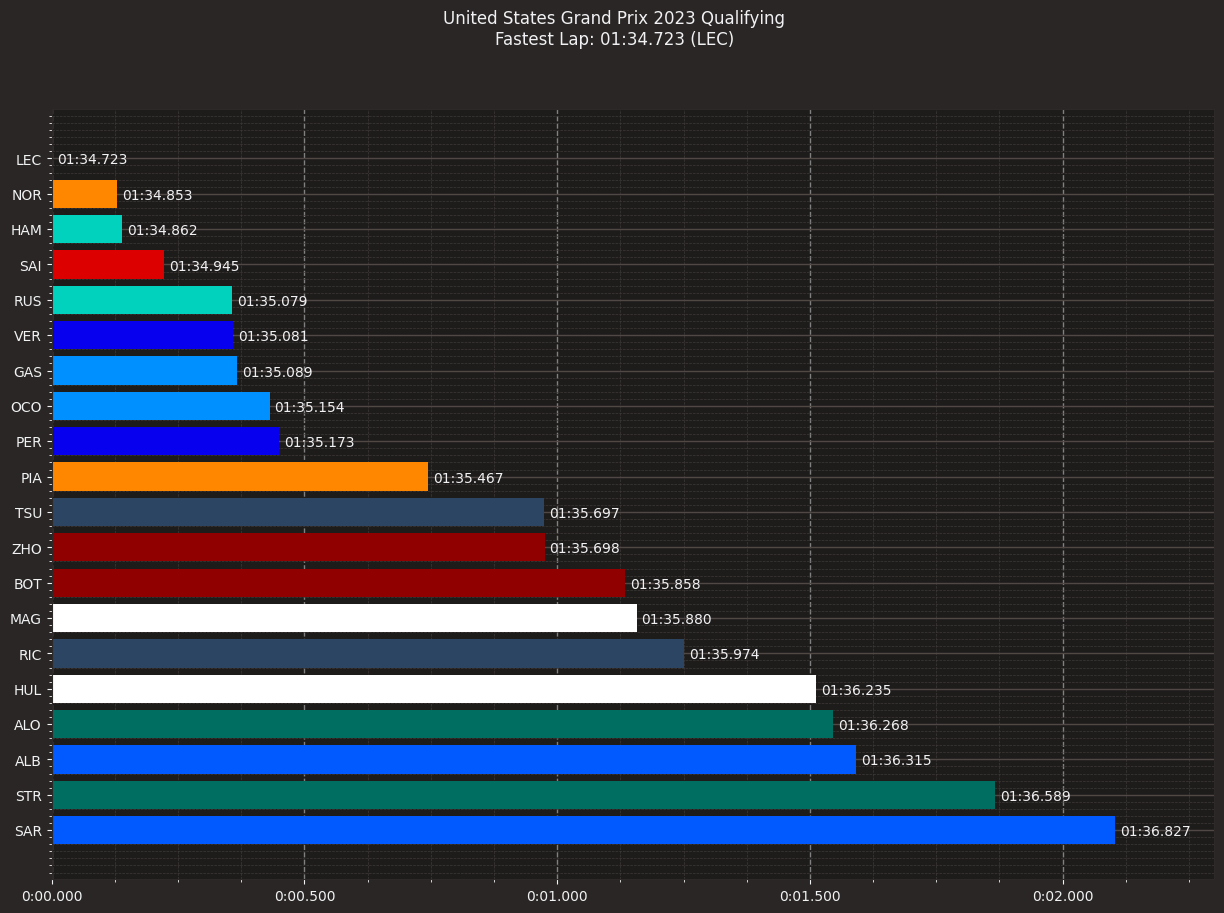

In [7]:
drivers = pd.unique(Q.laps['Driver'])
Q1, Q2, Q3 = Q.laps.split_qualifying_sessions()

list_fastest_laps = list()
for drv in drivers[15:]:
    drvs_fastest_lap = Q1.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
for drv in drivers[10:15]:
    drvs_fastest_lap = Q2.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
for drv in drivers[:10]:
    drvs_fastest_lap = Q3.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = f1plt.team_color(lap['Team'])
    team_colors.append(color)

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors)
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='grey', zorder=-1000)

lap_time_string = [strftimedelta(i, '%m:%s.%ms') for i in fastest_laps['LapTime']]

plt.suptitle(f"{Q.event['EventName']} {Q.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string[0]} ({pole_lap['Driver']})")

plt.text(fastest_laps.LapTimeDelta[0]+num2timedelta((1/24/60/60)*0.01), 0.15, lap_time_string[0], ha = 'left') # for 1st driver
for i in range(1,len(fastest_laps)):
    plt.text(fastest_laps.LapTimeDelta[i]+num2timedelta((1/24/60/60)*0.01), i+0.15, lap_time_string[i], ha = 'left')


plt.xlim(0, num2timedelta(2.3/24/60/60))
plt.show()

##### Leclerc vs Sargeant (Fastest vs Slowest)

C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


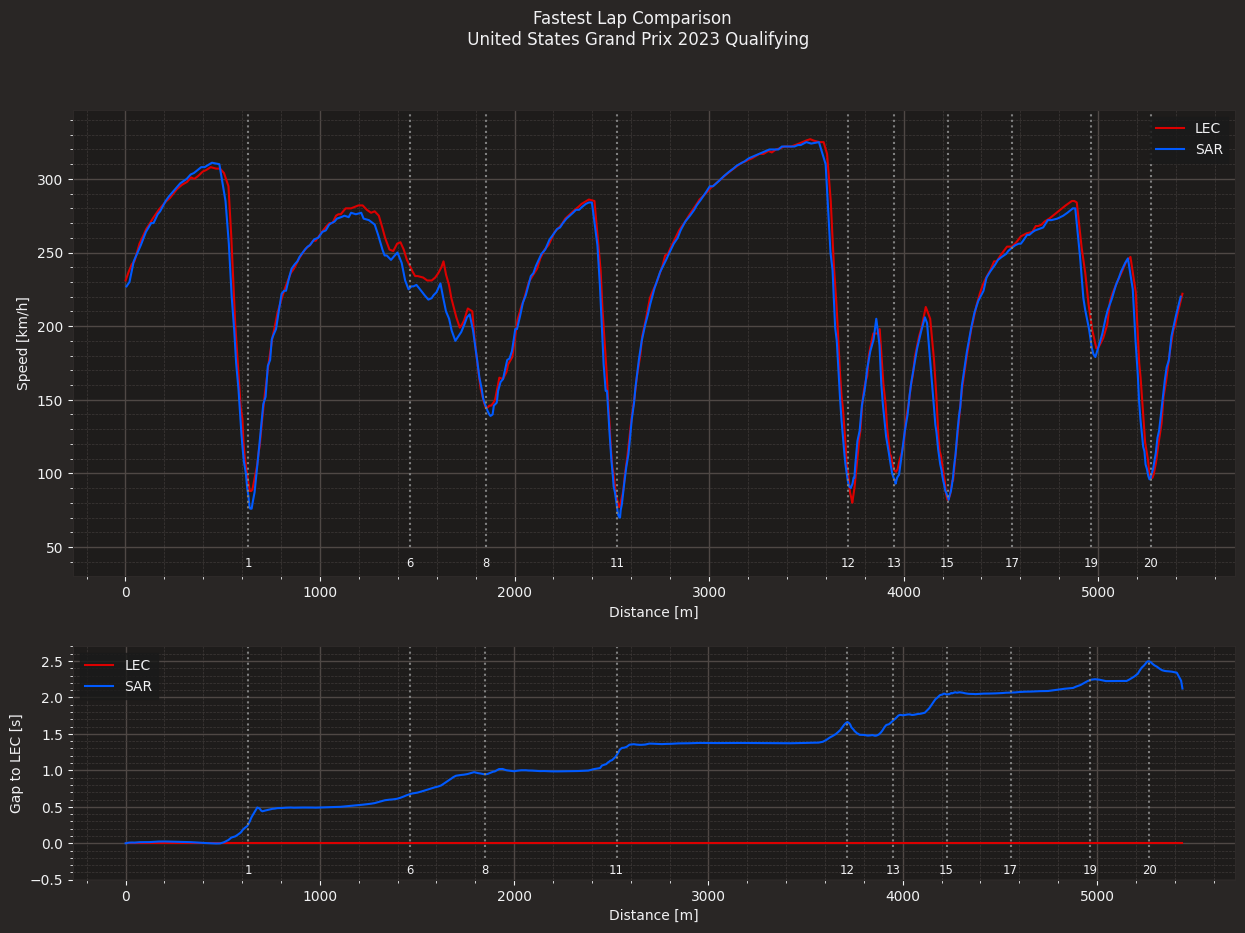

In [8]:
# Let's compare Sargeant (1:36.827) Leclerc (1:34.723)

# Data for Plot 1
sar_lap = Q.laps.pick_driver('SAR').pick_fastest()
lec_lap = Q.laps.pick_driver('LEC').pick_fastest()

# Get Telemetry from the laps
sar_tel = sar_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()

plot_ratios = [2, 1]
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': plot_ratios})

# Plot 1
ax[0].plot(lec_tel['Distance'], lec_tel['Speed'], color = f1plt.driver_color('LEC'), label = 'LEC')
ax[0].plot(sar_tel['Distance'], sar_tel['Speed'], color = f1plt.team_color('WIL'), label = 'SAR')
 
ax[0].set_xlabel('Distance [m]')
ax[0].set_ylabel('Speed [km/h]')

ax[0].legend()
plt.suptitle(f"Fastest Lap Comparison \n "
            f"{FP.event['EventName']} {FP.event.year} Qualifying")

selected_corners = [i-1 for i in (1,6,8,11,12,13,15,17,19,20)]
v_min = sar_tel['Speed'].min()
v_max = lec_tel['Speed'].max()
ax[0].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')
for _, corner in circuit_info.corners.iterrows():
    if corner['Number']-1 in selected_corners:
        txt = f"{corner['Number']}{corner['Letter']}"
        ax[0].text(corner['Distance'], v_min-30, txt,
                va='center_baseline', ha='center', size='small')
        ax[1].text(corner['Distance'], -.35, txt,
                va='center_baseline', ha='center', size='small')

ax[0].set_ylim([v_min - 40, v_max + 20])

# Data for Plot 2 and Plotting
delta_time_lec, ref_tel_lec, compare_tel_lec = f1u.delta_time(lec_lap, lec_lap)
delta_time_sar, ref_tel_sar, compare_tel_sar = f1u.delta_time(lec_lap, sar_lap)
ax[1].plot(ref_tel_lec['Distance'], delta_time_lec, color=f1plt.driver_color('LEC'), label='LEC')
ax[1].plot(ref_tel_sar['Distance'], delta_time_sar, color=f1plt.team_color('WIL'), label='SAR')
ax[1].set(ylabel=f"Gap to LEC [s]")
ax[1].set_xlabel('Distance [m]')
ax[1].legend()
ax[1].set_ylim([-.5,2.7])
ax[1].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=-.2, ymax=2.7,
          linestyles='dotted', colors='grey')

plt.show()

### Sprint Shootout

In [9]:
# Libreries
from matplotlib import cm

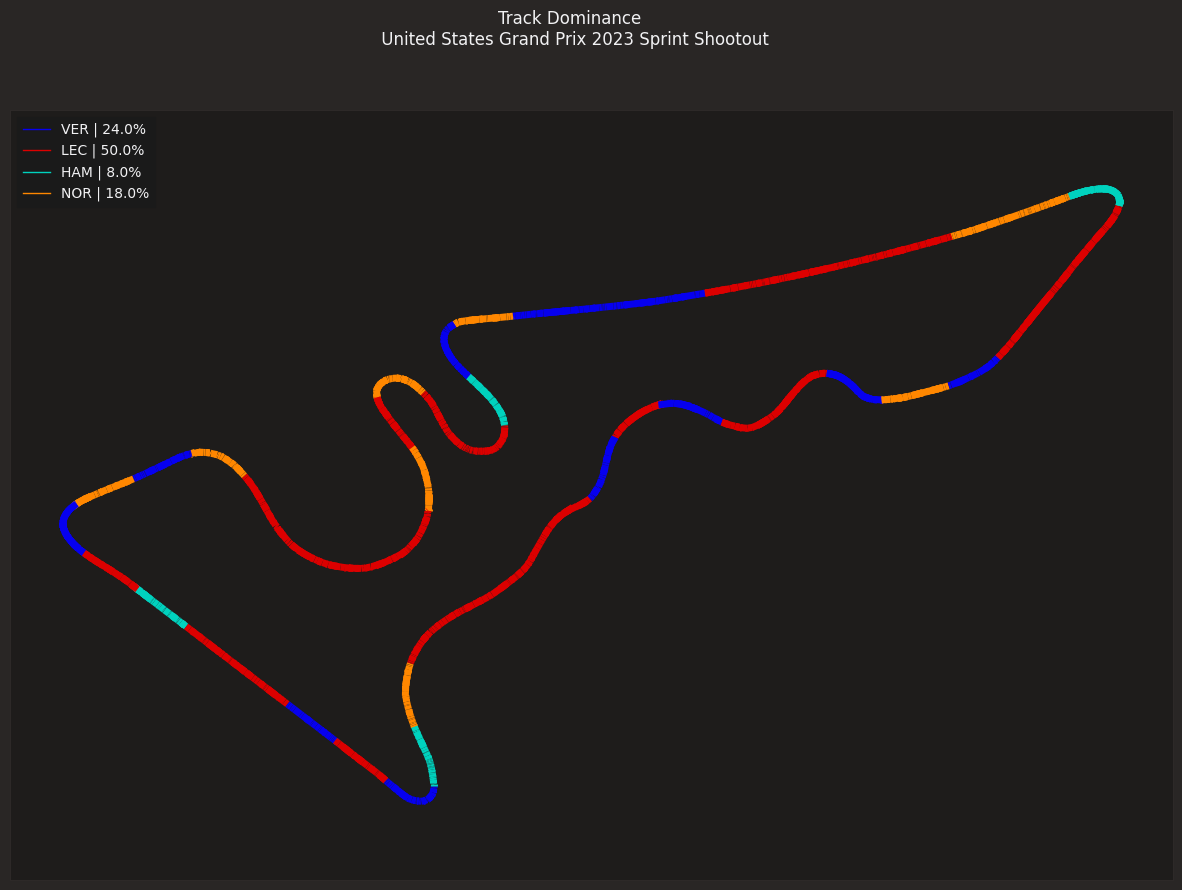

In [10]:
# Select the laps from Verstappen, Leclerc, Norris and Hamilton

from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D


laps_ver = SQ.laps.pick_driver('VER')
laps_lec = SQ.laps.pick_driver('LEC')
laps_nor = SQ.laps.pick_driver('NOR')
laps_ham = SQ.laps.pick_driver('HAM')

# Get the telemetry data from their fastest lap
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_lec = laps_lec.pick_fastest().get_telemetry().add_distance()
fastest_nor = laps_nor.pick_fastest().get_telemetry().add_distance()
fastest_ham = laps_ham.pick_fastest().get_telemetry().add_distance()

# Since the telemetry data does not have a variable that indicates the driver, 
# we need to create that column
fastest_ver['Driver'] = 'VER'
fastest_lec['Driver'] = 'LEC'
fastest_nor['Driver'] = 'NOR'
fastest_ham['Driver'] = 'HAM'

# Merge both lap telemetries so we have everything in one DataFrame
telemetry = pd.concat([fastest_ver, fastest_lec, fastest_nor, fastest_ham])

# We want 100 mini-sectors (this can be adjusted up and down)
num_minisectors = 50

# Grab the maximum value of distance that is known in the telemetry
total_distance = total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors 
minisector_length = total_distance / num_minisectors

telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

# Calculate avg. speed per driver per mini sector
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'LEC', 'Fastest_driver_int'] = 2
telemetry.loc[telemetry['Fastest_driver'] == 'HAM', 'Fastest_driver_int'] = 3
telemetry.loc[telemetry['Fastest_driver'] == 'NOR', 'Fastest_driver_int'] = 4

# Plotting Data
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

colors = (f1plt.team_color('RBR'), f1plt.team_color('FER'), f1plt.team_color('MER'), f1plt.team_color('MCL'))
cmap = ListedColormap(colors)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [15, 10]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

track_dominance = fastest_driver.set_index('Minisector').value_counts(normalize=True)

legend_lines = [Line2D([0], [0], color = colors[i], lw = 1) for i in range(4)]
plt.legend(legend_lines, 
           [f"{SQ.results.Abbreviation[0]} | {round(track_dominance[SQ.results.Abbreviation[0]]*100,1)}%",
            f"{SQ.results.Abbreviation[1]} | {round(track_dominance[SQ.results.Abbreviation[1]]*100,1)}%", 
            f"{SQ.results.Abbreviation[2]} | {round(track_dominance[SQ.results.Abbreviation[2]]*100,1)}%", 
            f"{SQ.results.Abbreviation[3]} | {round(track_dominance[SQ.results.Abbreviation[3]]*100,1)}%"],
            loc='upper left')
plt.suptitle(f"Track Dominance \n "
            f"{FP.event['EventName']} {FP.event.year} Sprint Shootout")

plt.show()

### Hamilton vs Verstappen vs Leclerc vs Norris

0 days 00:01:34.538000 0 days 00:01:34.593000


C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered depr

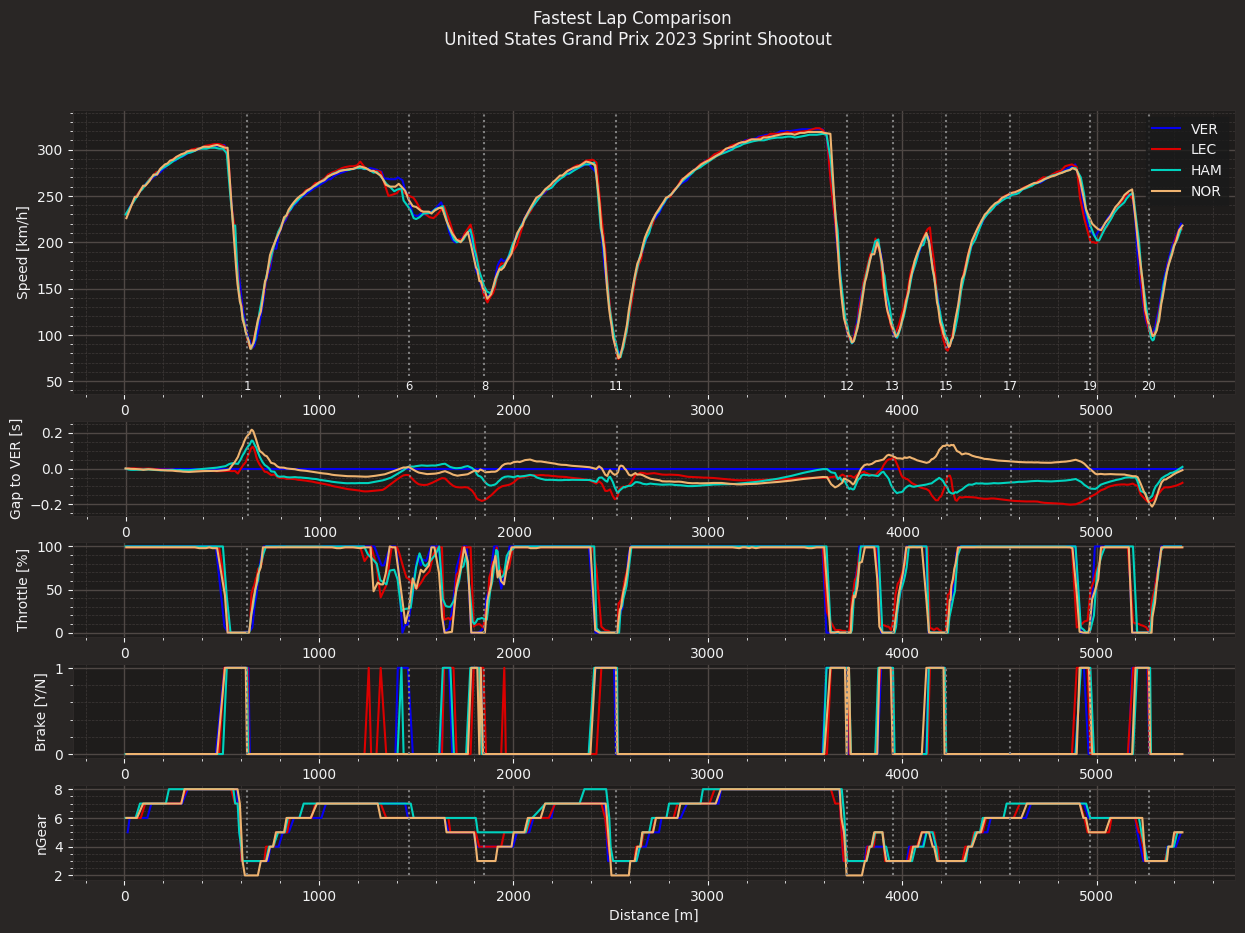

In [11]:
# Data for Plot 1
ham_lap = SQ.laps.pick_driver('HAM').pick_fastest()
lec_lap = SQ.laps.pick_driver('LEC').pick_fastest()
ver_lap = SQ.laps.pick_driver('VER').pick_fastest()
nor_lap = SQ.laps.pick_driver('NOR').pick_fastest()

# Get Telemetry from the laps
ham_tel = ham_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()
ver_tel = ver_lap.get_car_data().add_distance()
nor_tel = nor_lap.get_car_data().add_distance()

print(ver_lap['LapTime'], lec_lap['LapTime'])

plot_ratios = [3, 1, 1, 1, 1]
fig, ax = plt.subplots(5, 1, gridspec_kw={'height_ratios': plot_ratios})

# Plot 1
ax[0].plot(ver_tel['Distance'], ver_tel['Speed'], color = f1plt.driver_color('VER'), label = 'VER')
ax[0].plot(lec_tel['Distance'], lec_tel['Speed'], color = f1plt.driver_color('LEC'), label = 'LEC')
ax[0].plot(ham_tel['Distance'], ham_tel['Speed'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[0].plot(nor_tel['Distance'], nor_tel['Speed'], color = f1plt.driver_color('NOR'), label = 'NOR')
 
ax[0].set_xlabel('Distance [m]')
ax[0].set_ylabel('Speed [km/h]')

ax[0].legend()
plt.suptitle(f"Fastest Lap Comparison \n "
            f"{FP.event['EventName']} {FP.event.year} Sprint Shootout")

selected_corners = [i-1 for i in (1,6,8,11,12,13,15,17,19,20)]
v_min = ham_tel['Speed'].min()
v_max = lec_tel['Speed'].max()

ax[0].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=v_min-20, ymax=v_max+20,
             linestyles='dotted', colors='grey')


ax[0].set_ylim([v_min - 40, v_max + 20])

# Data for Plot 2 and Plotting
delta_time_ver, ref_tel_ver, compare_tel_ver = f1u.delta_time(ver_lap, ver_lap)
delta_time_lec, ref_tel_lec, compare_tel_lec = f1u.delta_time(ver_lap, lec_lap)
delta_time_ham, ref_tel_ham, compare_tel_ham = f1u.delta_time(ver_lap, ham_lap)
delta_time_nor, ref_tel_nor, compare_tel_nor = f1u.delta_time(ver_lap, nor_lap)
ax[1].plot(ref_tel_ver['Distance'], delta_time_ver, color=f1plt.driver_color('VER'), label='VER')
ax[1].plot(ref_tel_lec['Distance'], delta_time_lec, color=f1plt.driver_color('LEC'), label='LEC')
ax[1].plot(ref_tel_ham['Distance'], delta_time_ham, color=f1plt.driver_color('HAM'), label='HAM')
ax[1].plot(ref_tel_nor['Distance'], delta_time_nor, color=f1plt.driver_color('NOR'), label='NOR')
ax[1].set(ylabel=f"Gap to VER [s]")
ax[1].set_xlabel('Distance [m]')
ymin = min(delta_time_lec.min(), delta_time_ver.min(), delta_time_ham.min(), delta_time_nor.min())
ymax = max(delta_time_lec.max(), delta_time_ver.max(), delta_time_ham.max(), delta_time_nor.max())
ax[1].set_ylim([ymin - .05, ymax + .05])
ax[1].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=ymin-.05, ymax=ymax+.05,
          linestyles='dotted', colors='grey')

# Data for Plot 3 and Plotting
ax[2].plot(ver_tel['Distance'], ver_tel['Throttle'], color = f1plt.driver_color('VER'), label = 'VER')
ax[2].plot(lec_tel['Distance'], lec_tel['Throttle'], color = f1plt.driver_color('LEC'), label = 'LEC')
ax[2].plot(ham_tel['Distance'], ham_tel['Throttle'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[2].plot(nor_tel['Distance'], nor_tel['Throttle'], color = f1plt.driver_color('NOR'), label = 'NOR')
 
ax[2].set_xlabel('Distance [m]')
ax[2].set_ylabel('Throttle [%]')
ax[2].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=0, ymax=100,
          linestyles='dotted', colors='grey')

# Data for Plot 4 and Plotting
ax[3].plot(ver_tel['Distance'], ver_tel['Brake'], color = f1plt.driver_color('VER'), label = 'VER')
ax[3].plot(lec_tel['Distance'], lec_tel['Brake'], color = f1plt.driver_color('LEC'), label = 'LEC')
ax[3].plot(ham_tel['Distance'], ham_tel['Brake'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[3].plot(nor_tel['Distance'], nor_tel['Brake'], color = f1plt.driver_color('NOR'), label = 'NOR')
ax[3].set_yticks([0,1]) 
ax[3].set_xlabel('Distance [m]')
ax[3].set_ylabel('Brake [Y/N]')
ax[3].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=0, ymax=1,
          linestyles='dotted', colors='grey')

# Data for Plot 5 and Plotting
ax[4].plot(ver_tel['Distance'], ver_tel['nGear'], color = f1plt.driver_color('VER'), label = 'VER')
ax[4].plot(lec_tel['Distance'], lec_tel['nGear'], color = f1plt.driver_color('LEC'), label = 'LEC')
ax[4].plot(ham_tel['Distance'], ham_tel['nGear'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[4].plot(nor_tel['Distance'], nor_tel['nGear'], color = f1plt.driver_color('NOR'), label = 'NOR')
ax[4].set_yticks(range(2,9, 2))
ax[4].set_xlabel('Distance [m]')
ax[4].set_ylabel('nGear')
ax[4].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=2, ymax=8,
          linestyles='dotted', colors='grey')

# Corners
for _, corner in circuit_info.corners.iterrows():
    if corner['Number']-1 in selected_corners:
        txt = f"{corner['Number']}{corner['Letter']}"
        ax[0].text(corner['Distance'], v_min-30, txt,
                va='center_baseline', ha='center', size='small')
        #ax[1].text(corner['Distance'], ymin-.1, txt,
                #va='center_baseline', ha='center', size='small')

plt.show()

C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered depr

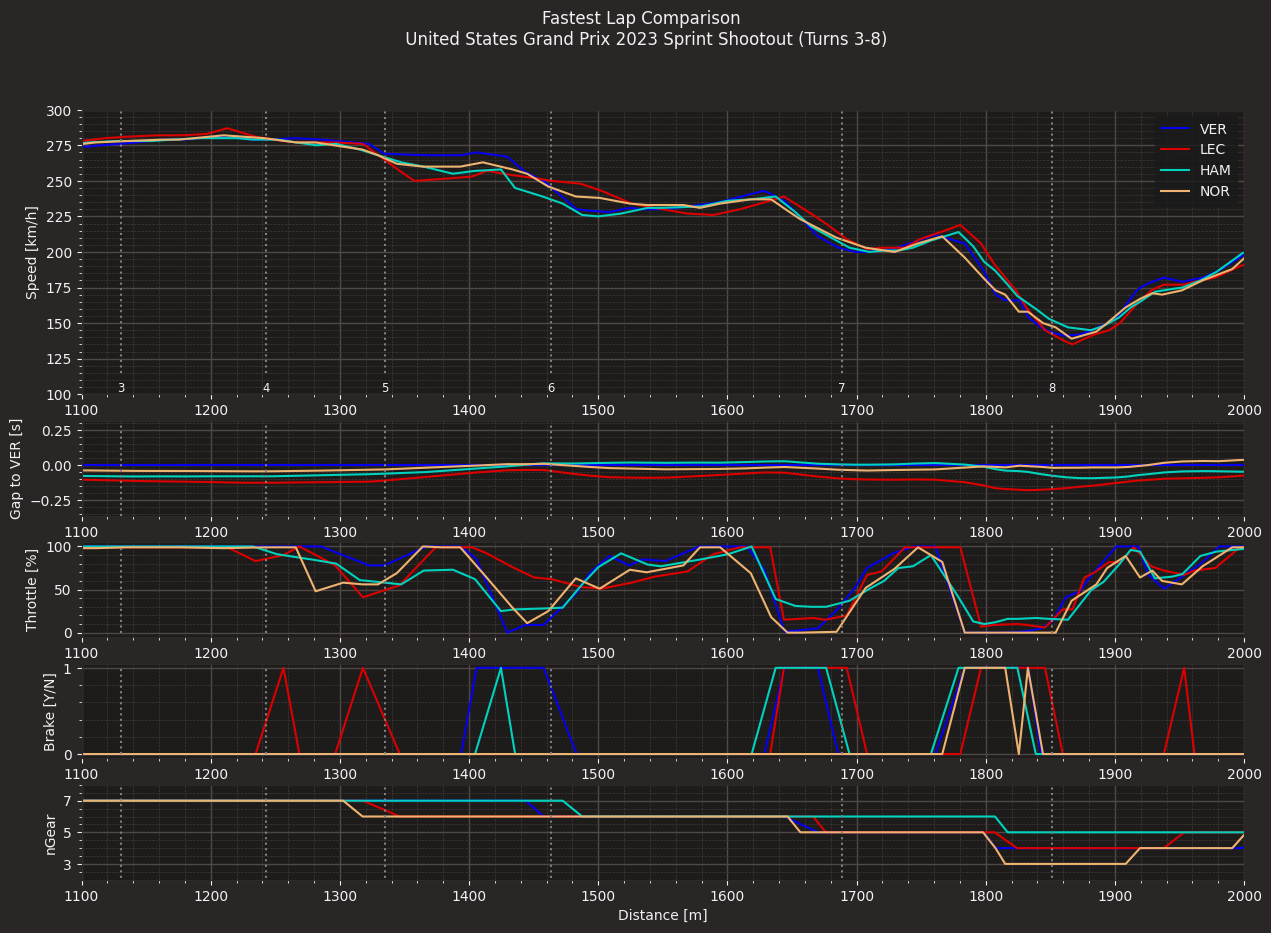

In [12]:
fig, ax = plt.subplots(5, 1, gridspec_kw={'height_ratios': plot_ratios})

# Plot 1
ax[0].plot(ver_tel['Distance'], ver_tel['Speed'], color = f1plt.driver_color('VER'), label = 'VER')
ax[0].plot(lec_tel['Distance'], lec_tel['Speed'], color = f1plt.driver_color('LEC'), label = 'LEC')
ax[0].plot(ham_tel['Distance'], ham_tel['Speed'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[0].plot(nor_tel['Distance'], nor_tel['Speed'], color = f1plt.driver_color('NOR'), label = 'NOR')
 
ax[0].set_xlabel('Distance [m]')
ax[0].set_ylabel('Speed [km/h]')

ax[0].legend()
plt.suptitle(f"Fastest Lap Comparison \n "
            f"{FP.event['EventName']} {FP.event.year} Sprint Shootout")

selected_corners = [i-1 for i in (3, 4, 5, 6, 7, 8)]
v_min = ham_tel['Speed'].min()
v_max = lec_tel['Speed'].max()

ax[0].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=115, ymax=v_max+20,
             linestyles='dotted', colors='grey')


ax[0].set_ylim([100, 300])
ax[0].set_xlim([1100,2000])

# Data for Plot 2 and Plotting
delta_time_ver, ref_tel_ver, compare_tel_ver = f1u.delta_time(ver_lap, ver_lap)
delta_time_lec, ref_tel_lec, compare_tel_lec = f1u.delta_time(ver_lap, lec_lap)
delta_time_ham, ref_tel_ham, compare_tel_ham = f1u.delta_time(ver_lap, ham_lap)
delta_time_nor, ref_tel_nor, compare_tel_nor = f1u.delta_time(ver_lap, nor_lap)
ax[1].plot(ref_tel_ver['Distance'], delta_time_ver, color=f1plt.driver_color('VER'), label='VER')
ax[1].plot(ref_tel_lec['Distance'], delta_time_lec, color=f1plt.driver_color('LEC'), label='LEC')
ax[1].plot(ref_tel_ham['Distance'], delta_time_ham, color=f1plt.driver_color('HAM'), label='HAM')
ax[1].plot(ref_tel_nor['Distance'], delta_time_nor, color=f1plt.driver_color('NOR'), label='NOR')
ax[1].set(ylabel=f"Gap to VER [s]")
ax[1].set_xlabel('Distance [m]')
ymin = min(delta_time_lec.min(), delta_time_ver.min(), delta_time_ham.min(), delta_time_nor.min())
ymax = max(delta_time_lec.max(), delta_time_ver.max(), delta_time_ham.max(), delta_time_nor.max())
ax[1].set_ylim([ymin - 0.15, ymax + 0.1])
ax[1].set_xlim([1100,2000])
ax[1].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=ymin-0.15, ymax=ymax+0.1,
          linestyles='dotted', colors='grey')

# Data for Plot 3 and Plotting
ax[2].plot(ver_tel['Distance'], ver_tel['Throttle'], color = f1plt.driver_color('VER'), label = 'VER')
ax[2].plot(lec_tel['Distance'], lec_tel['Throttle'], color = f1plt.driver_color('LEC'), label = 'LEC')
ax[2].plot(ham_tel['Distance'], ham_tel['Throttle'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[2].plot(nor_tel['Distance'], nor_tel['Throttle'], color = f1plt.driver_color('NOR'), label = 'NOR')
ax[2].set_xlim([1100,2000])
ax[2].set_xlabel('Distance [m]')
ax[2].set_ylabel('Throttle [%]')
ax[2].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=0, ymax=100,
          linestyles='dotted', colors='grey')

# Data for Plot 4 and Plotting
ax[3].plot(ver_tel['Distance'], ver_tel['Brake'], color = f1plt.driver_color('VER'), label = 'VER')
ax[3].plot(lec_tel['Distance'], lec_tel['Brake'], color = f1plt.driver_color('LEC'), label = 'LEC')
ax[3].plot(ham_tel['Distance'], ham_tel['Brake'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[3].plot(nor_tel['Distance'], nor_tel['Brake'], color = f1plt.driver_color('NOR'), label = 'NOR')
ax[3].set_yticks([0,1])
ax[3].set_xlim([1100,2000])
ax[3].set_xlabel('Distance [m]')
ax[3].set_ylabel('Brake [Y/N]')
ax[3].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=0, ymax=1,
          linestyles='dotted', colors='grey')


# Data for Plot 5 and Plotting
ax[4].plot(ver_tel['Distance'], ver_tel['nGear'], color = f1plt.driver_color('VER'), label = 'VER')
ax[4].plot(lec_tel['Distance'], lec_tel['nGear'], color = f1plt.driver_color('LEC'), label = 'LEC')
ax[4].plot(ham_tel['Distance'], ham_tel['nGear'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[4].plot(nor_tel['Distance'], nor_tel['nGear'], color = f1plt.driver_color('NOR'), label = 'NOR')
ax[4].set_xlim([1100,2000])
ax[4].set_ylim([2,8])
ax[4].set_yticks(range(3,8,2))
ax[4].set_xlabel('Distance [m]')
ax[4].set_ylabel('nGear')
ax[4].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=0, ymax=8,
          linestyles='dotted', colors='grey')


# Corners
for _, corner in circuit_info.corners.iterrows():
    if corner['Number']-1 in selected_corners:
        txt = f"{corner['Number']}{corner['Letter']}"
        ax[0].text(corner['Distance'], 105, txt,
                va='center_baseline', ha='center', size='small')
        #ax[1].text(corner['Distance'], ymin-.1, txt,
        #        va='center_baseline', ha='center', size='small')

plt.suptitle(f"Fastest Lap Comparison \n "
            f"{FP.event['EventName']} {FP.event.year} Sprint Shootout (Turns 3-8)")
plt.show()

C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
C:\Users\Simone\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered depr

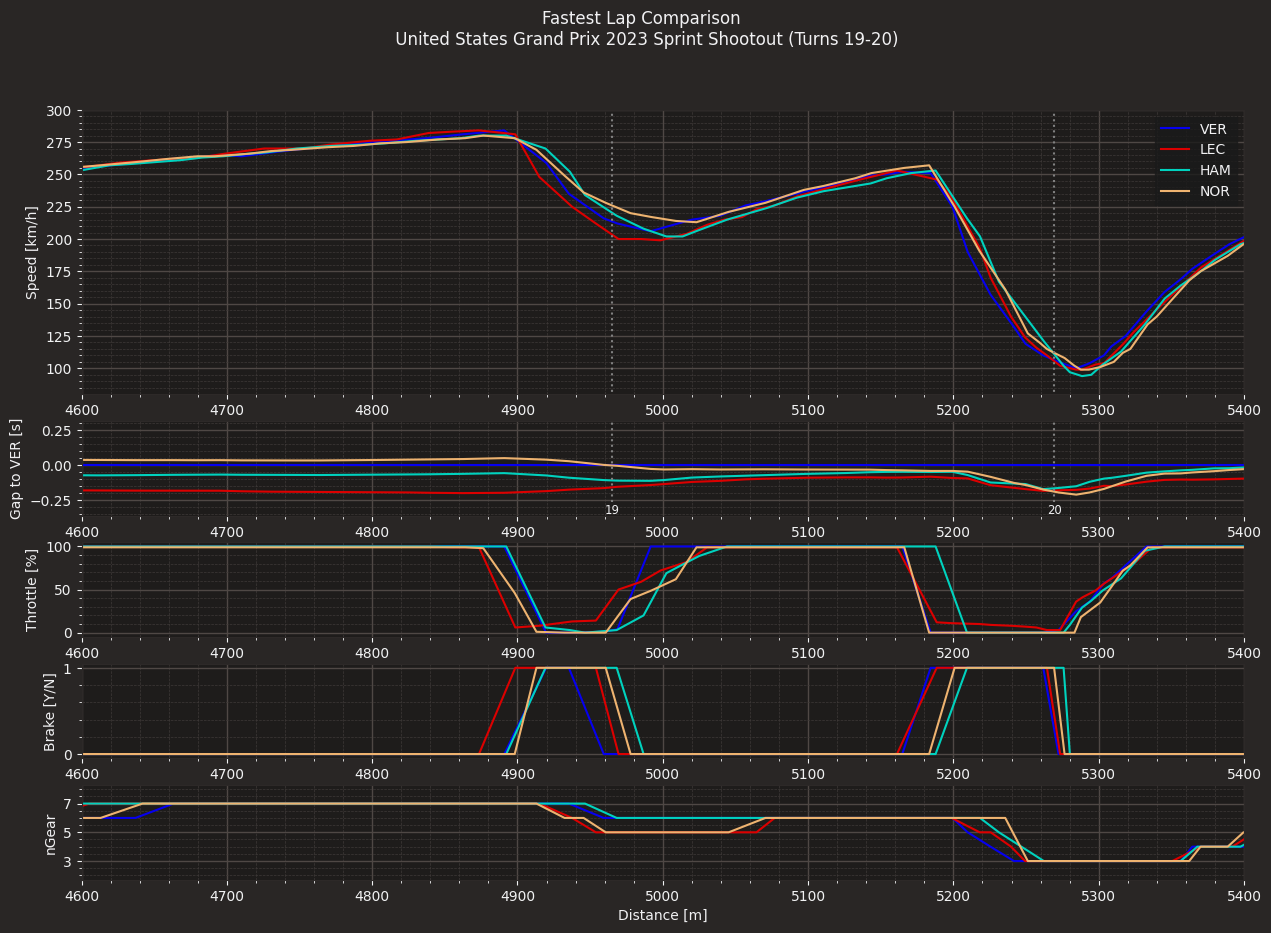

In [13]:
fig, ax = plt.subplots(5, 1, gridspec_kw={'height_ratios': plot_ratios})

# Plot 1
ax[0].plot(ver_tel['Distance'], ver_tel['Speed'], color = f1plt.driver_color('VER'), label = 'VER')
ax[0].plot(lec_tel['Distance'], lec_tel['Speed'], color = f1plt.driver_color('LEC'), label = 'LEC')
ax[0].plot(ham_tel['Distance'], ham_tel['Speed'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[0].plot(nor_tel['Distance'], nor_tel['Speed'], color = f1plt.driver_color('NOR'), label = 'NOR')
 
ax[0].set_xlabel('Distance [m]')
ax[0].set_ylabel('Speed [km/h]')

ax[0].legend()
plt.suptitle(f"Fastest Lap Comparison \n "
            f"{FP.event['EventName']} {FP.event.year} Sprint Shootout")

selected_corners = [i-1 for i in (19,20)]
v_min = ham_tel['Speed'].min()
v_max = lec_tel['Speed'].max()

ax[0].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=v_min-20, ymax=v_max+20,
             linestyles='dotted', colors='grey')


ax[0].set_ylim([80, 300])
ax[0].set_xlim([4600,5400])

# Data for Plot 2 and Plotting
delta_time_ver, ref_tel_ver, compare_tel_ver = f1u.delta_time(ver_lap, ver_lap)
delta_time_lec, ref_tel_lec, compare_tel_lec = f1u.delta_time(ver_lap, lec_lap)
delta_time_ham, ref_tel_ham, compare_tel_ham = f1u.delta_time(ver_lap, ham_lap)
delta_time_nor, ref_tel_nor, compare_tel_nor = f1u.delta_time(ver_lap, nor_lap)
ax[1].plot(ref_tel_ver['Distance'], delta_time_ver, color=f1plt.driver_color('VER'), label='VER')
ax[1].plot(ref_tel_lec['Distance'], delta_time_lec, color=f1plt.driver_color('LEC'), label='LEC')
ax[1].plot(ref_tel_ham['Distance'], delta_time_ham, color=f1plt.driver_color('HAM'), label='HAM')
ax[1].plot(ref_tel_nor['Distance'], delta_time_nor, color=f1plt.driver_color('NOR'), label='NOR')
ax[1].set(ylabel=f"Gap to VER [s]")
ax[1].set_xlabel('Distance [m]')
ymin = min(delta_time_lec.min(), delta_time_ver.min(), delta_time_ham.min(), delta_time_nor.min())
ymax = max(delta_time_lec.max(), delta_time_ver.max(), delta_time_ham.max(), delta_time_nor.max())
ax[1].set_ylim([ymin - 0.15, ymax + 0.1])
ax[1].set_xlim([4600,5400])
ax[1].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=ymin-0.05, ymax=ymax+0.1,
          linestyles='dotted', colors='grey')

# Data for Plot 3 and Plotting
ax[2].plot(ver_tel['Distance'], ver_tel['Throttle'], color = f1plt.driver_color('VER'), label = 'VER')
ax[2].plot(lec_tel['Distance'], lec_tel['Throttle'], color = f1plt.driver_color('LEC'), label = 'LEC')
ax[2].plot(ham_tel['Distance'], ham_tel['Throttle'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[2].plot(nor_tel['Distance'], nor_tel['Throttle'], color = f1plt.driver_color('NOR'), label = 'NOR')
ax[2].set_xlim([4600,5400])
ax[2].set_xlabel('Distance [m]')
ax[2].set_ylabel('Throttle [%]')

# Data for Plot 4 and Plotting
ax[3].plot(ver_tel['Distance'], ver_tel['Brake'], color = f1plt.driver_color('VER'), label = 'VER')
ax[3].plot(lec_tel['Distance'], lec_tel['Brake'], color = f1plt.driver_color('LEC'), label = 'LEC')
ax[3].plot(ham_tel['Distance'], ham_tel['Brake'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[3].plot(nor_tel['Distance'], nor_tel['Brake'], color = f1plt.driver_color('NOR'), label = 'NOR')
ax[3].set_yticks([0,1])
ax[3].set_xlim([4600,5400])
ax[3].set_xlabel('Distance [m]')
ax[3].set_ylabel('Brake [Y/N]')


# Data for Plot 5 and Plotting
ax[4].plot(ver_tel['Distance'], ver_tel['nGear'], color = f1plt.driver_color('VER'), label = 'VER')
ax[4].plot(lec_tel['Distance'], lec_tel['nGear'], color = f1plt.driver_color('LEC'), label = 'LEC')
ax[4].plot(ham_tel['Distance'], ham_tel['nGear'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[4].plot(nor_tel['Distance'], nor_tel['nGear'], color = f1plt.driver_color('NOR'), label = 'NOR')
ax[4].set_xlim([4600,5400])
ax[4].set_yticks(range(3,8,2))
ax[4].set_xlabel('Distance [m]')
ax[4].set_ylabel('nGear')


# Corners
for _, corner in circuit_info.corners.iterrows():
    if corner['Number']-1 in selected_corners:
        txt = f"{corner['Number']}{corner['Letter']}"
        ax[0].text(corner['Distance'], v_min-30, txt,
                va='center_baseline', ha='center', size='small')
        ax[1].text(corner['Distance'], ymin-.1, txt,
                va='center_baseline', ha='center', size='small')

plt.suptitle(f"Fastest Lap Comparison \n "
            f"{FP.event['EventName']} {FP.event.year} Sprint Shootout (Turns 19-20)")
plt.show()

### Sprint Race

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')


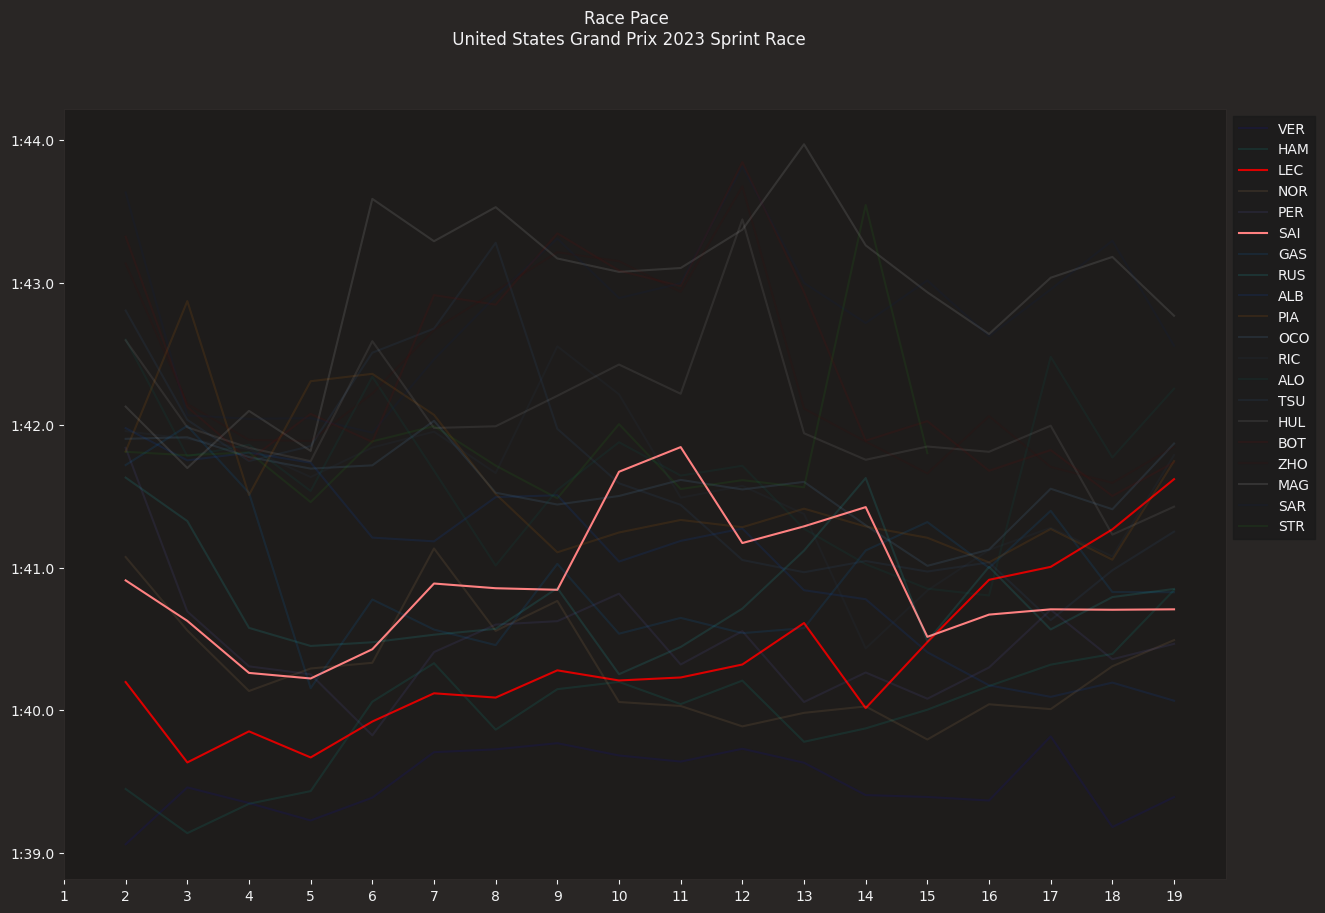

In [14]:
print(SR.laps.columns)
active = 1
inactive = 0.1
alpha = {
    'VER': inactive,
    'HAM': inactive,
    'LEC': active,
    'NOR': inactive,
    'PER': inactive,
    'SAI': active,
    'GAS': inactive,
    'RUS': inactive,
    'ALB': inactive,
    'PIA': inactive,
    'OCO': inactive,
    'RIC': inactive,
    'ALO': inactive,
    'TSU': inactive,
    'HUL': inactive,
    'BOT': inactive,
    'ZHO': inactive,
    'MAG': inactive,
    'SAR': inactive,
    'STR': inactive
}
for drv in pd.unique(SR.laps['Driver']):
    plt.plot(SR.laps.pick_driver(drv).pick_quicklaps()['LapNumber'], SR.laps.pick_driver(drv).pick_quicklaps()['LapTime'], color = f1plt.driver_color(drv), label = drv, alpha=alpha[drv])

plt.xticks([i for i in range(1,20)])
plt.suptitle(f"Race Pace\n "
            f"{FP.event['EventName']} {FP.event.year} Sprint Race")
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\Simone\AppData\Local\Temp\ipykernel_10968\3444303340.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=transformed_laps,


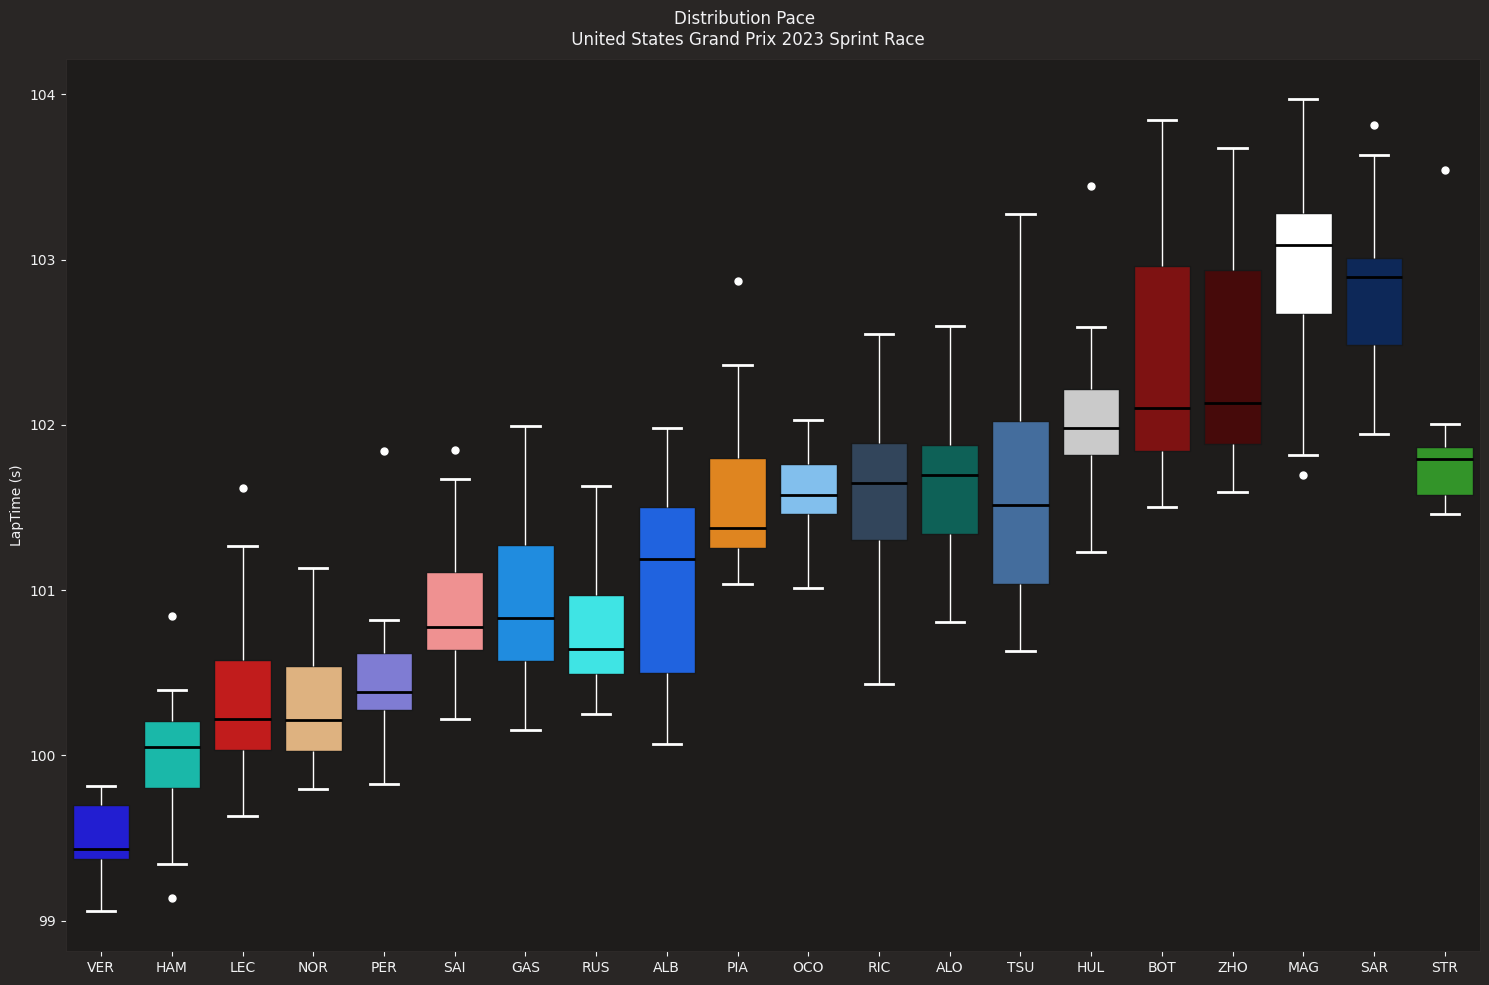

In [15]:
import seaborn as sns

transformed_laps = SR.laps.pick_quicklaps().copy()
transformed_laps.loc[:, "LapTime (s)"] = SR.laps["LapTime"].dt.total_seconds()

driver_order = pd.unique(SR.laps['Driver'])

driver_colors = {abv: f1plt.DRIVER_COLORS[driver] for abv, driver in f1plt.DRIVER_TRANSLATE.items()}

# Imposta i parametri per i bastoncini (whiskers) e gli outliers
whiskerprops = dict(linewidth=1, color='white') # Bastoncini
flierprops = dict(marker='o', markerfacecolor='white', markersize=5, markeredgecolor='white') # Outliers
capprops = dict(linewidth=2, color='white') # Linea Orizzontale
medianprops = dict(linewidth=2, color='Black') # Mediana

sns.boxplot(data=transformed_laps,
            x="Driver",
            y="LapTime (s)",
            order=driver_order,
            palette=driver_colors,
            whiskerprops=whiskerprops,
            capprops=capprops,
            medianprops=medianprops,
            flierprops=flierprops,
)
plt.grid(visible=False)
plt.xlabel("")  # Rimuovi l'etichetta x
plt.suptitle(f"Distribution Pace\n "
            f"{FP.event['EventName']} {FP.event.year} Sprint Race")

plt.tight_layout()
plt.show()


### Race

##### Che si fa per la gara?
- Grafico Strategie
- Grafo Posizioni
- Grafico Distacchi Giro per Giro + Focalizzazione LEC e SAI per introduzione grafico successivo
- Grafico Confronto LEC vs SAI (1 sosta vs 2 soste)

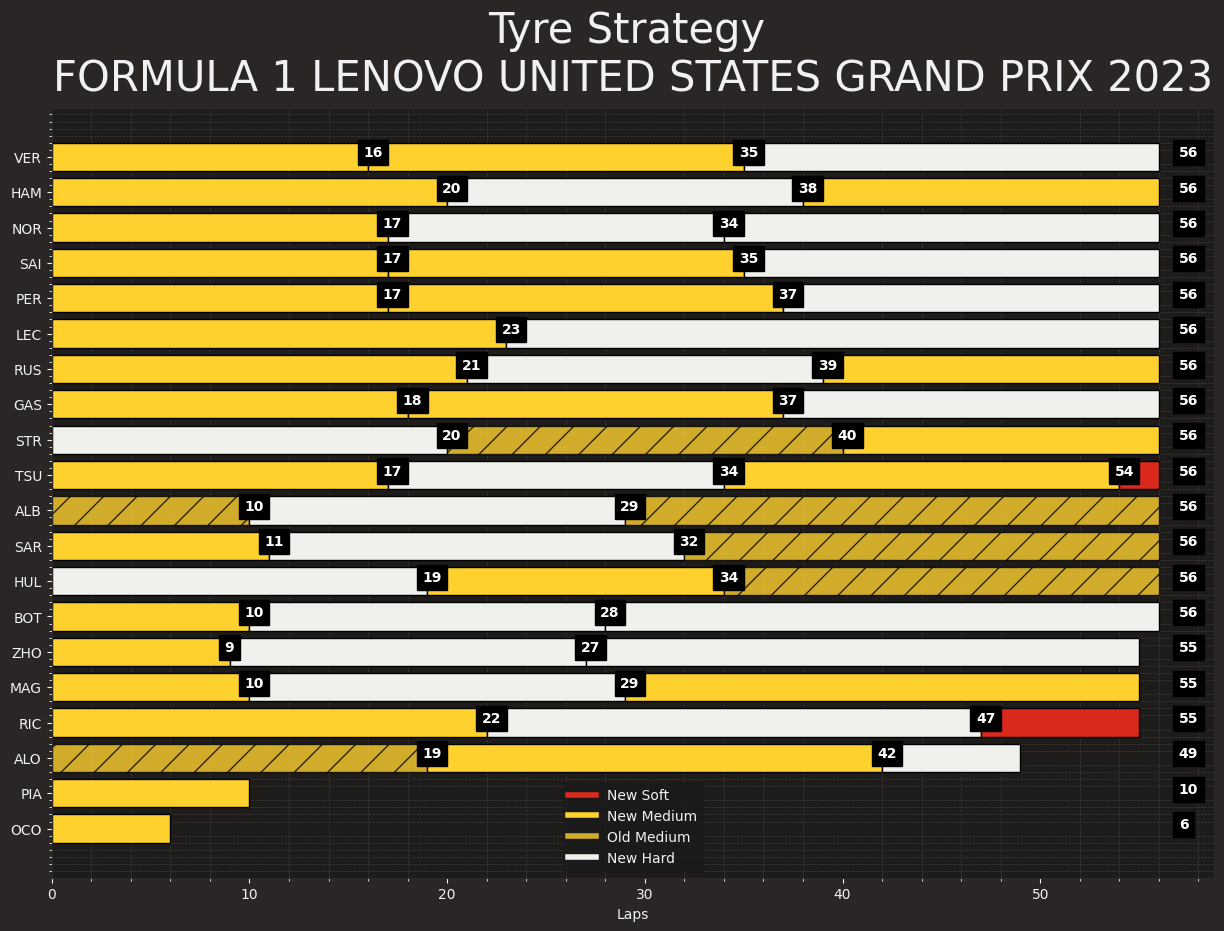

In [47]:
fig, ax = plt.subplots()
plt.title('Tyre Strategy \n'+R.event.OfficialEventName,  fontsize=30)
plt.xlabel('Laps')
plt.grid(False)

# Tyre Stint
compound_color = {key: value for key,value in f1plt.COMPOUND_COLORS.items()}
tyre_stint = R.laps.groupby(['Driver','Stint','Compound','FreshTyre']).agg({'LapNumber': 'min', 'TyreLife': 'count'}).reset_index()

order_graph = ['VER', 'HAM', 'NOR', 'SAI', 'PER', 'LEC', 'RUS', 'GAS', 'STR', 'TSU', 'ALB', 'SAR', 'HUL', 'BOT', 'ZHO', 'MAG', 'RIC', 'ALO', 'PIA', 'OCO']

for drv in list(order_graph)[::-1]:
    driver_stints = tyre_stint[tyre_stint['Driver']== drv]

    for idx, row in driver_stints.iterrows():
        plt.barh(
            y=drv,
            width=row["TyreLife"],
            left=max(row['LapNumber']-1, 0),
            color=compound_color[row.Compound],
            edgecolor="black",
            fill=True,
            # for new/old tyre
            alpha = 0.8 if not row.FreshTyre else 1, hatch = '/' if not row.FreshTyre else None,
        )

        if not row['LapNumber'] <= 1.0:
            plt.text(row['LapNumber']-1.25, drv, round(row['LapNumber']-1), fontweight='extra bold', backgroundcolor='black', color = 'white')

    plt.text(R.laps.LapNumber.max()+1, drv, driver_stints['TyreLife'].sum(), fontweight='extra bold', backgroundcolor='black', color = 'white')


custom_lines = [Line2D([0], [0], color=compound_color['SOFT'], lw=4),
                Line2D([0], [0], color=compound_color['MEDIUM'], lw=4),
                Line2D([0], [0], color=compound_color['MEDIUM'], alpha=0.8, lw=4),
                Line2D([0], [0], color=compound_color['HARD'], lw=4)]

plt.legend(custom_lines, ['New Soft', 'New Medium', 'Old Medium', 'New Hard'], loc='lower center')
plt.show()

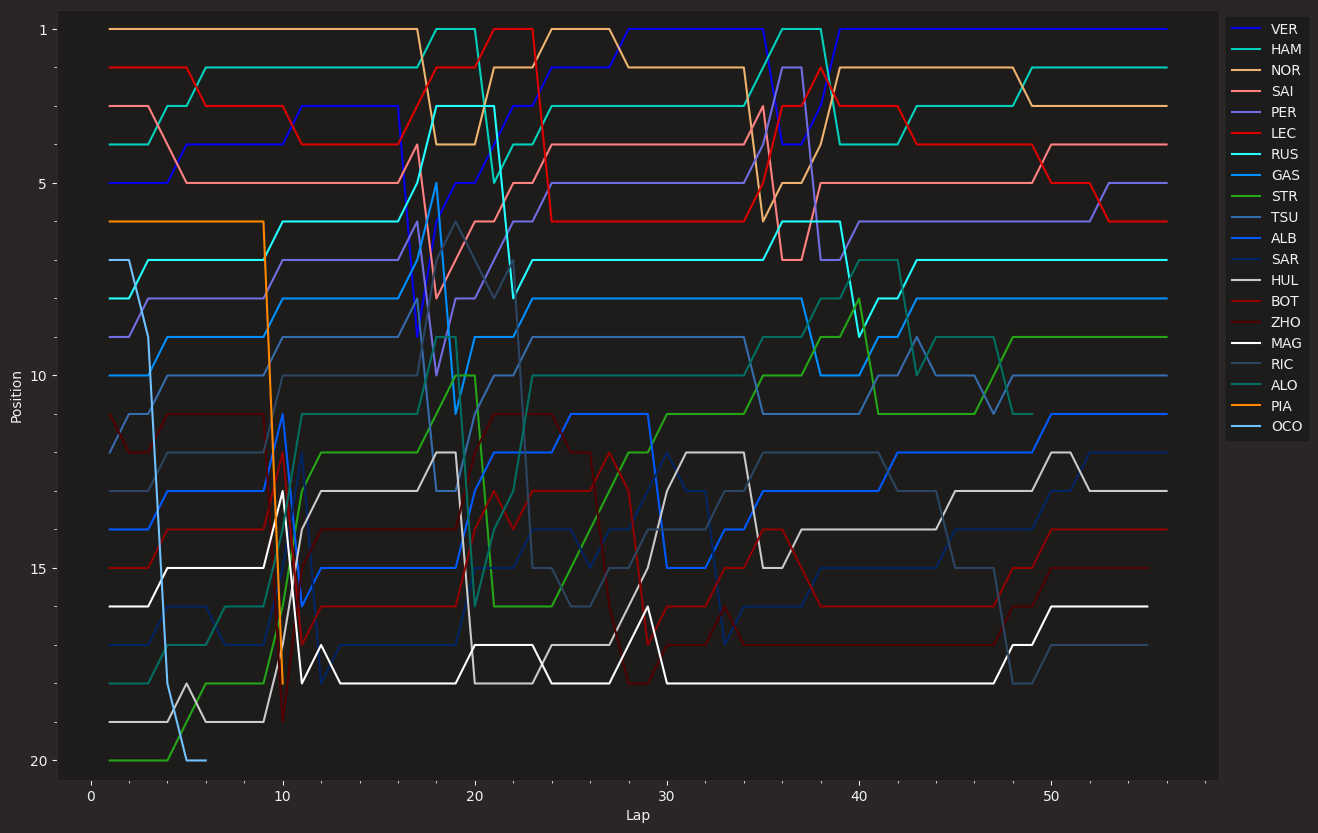

In [17]:
fig, ax = plt.subplots(1,1)
f1plt.setup_mpl(misc_mpl_mods=False)

for drv in order_graph:
    drv_laps = R.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = f1plt.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)
    
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
ax.legend(bbox_to_anchor=(1.0, 1.0))

ax.xaxis.grid(False,'minor')
ax.yaxis.grid(False,'minor')
plt.grid(visible=False)
plt.show()

##### Considerazione sul numero di sorpassi in pista (Usando F1 Fantasy)?

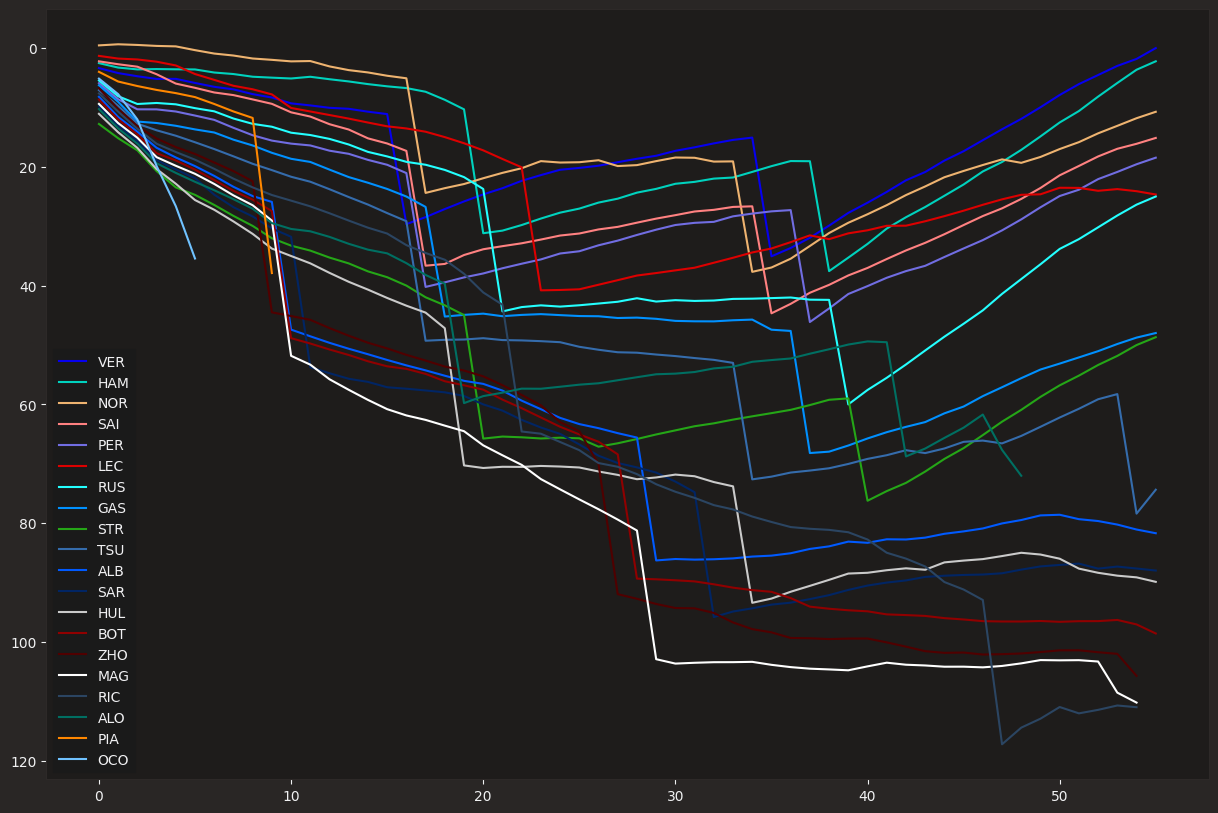

In [18]:
### Trying Cumulative Plot
# Race Leader Laps
leader = R.laps.pick_driver(R.results.Abbreviation.iloc[0])
### Create cumulative time for the mean of his race
reference = pd.Series([leader.LapTime.mean() for i in range(len(leader.LapTime))]).cumsum()
### Transparence
alpha = {
    'VER': active,
    'HAM': inactive,
    'LEC': active,
    'NOR': inactive,
    'PER': inactive,
    'SAI': active,
    'GAS': inactive,
    'RUS': inactive,
    'ALB': inactive,
    'PIA': inactive,
    'OCO': inactive,
    'RIC': inactive,
    'ALO': inactive,
    'TSU': inactive,
    'HUL': inactive,
    'BOT': inactive,
    'ZHO': inactive,
    'MAG': inactive,
    'SAR': inactive,
    'STR': inactive
}
### For every driver, calculate its distance to Reference
for drv in order_graph:
    laps = R.laps.pick_driver(drv).reset_index()
    cumulative = laps.LapTime.cumsum()
    gap = (cumulative - reference).apply(lambda x: x.total_seconds())
    plt.plot(gap, color = f1plt.driver_color(drv), label = drv, alpha = 1) #alpha[drv])

plt.gca().invert_yaxis()
plt.legend()
plt.show()

### Leclerc vs Sainz

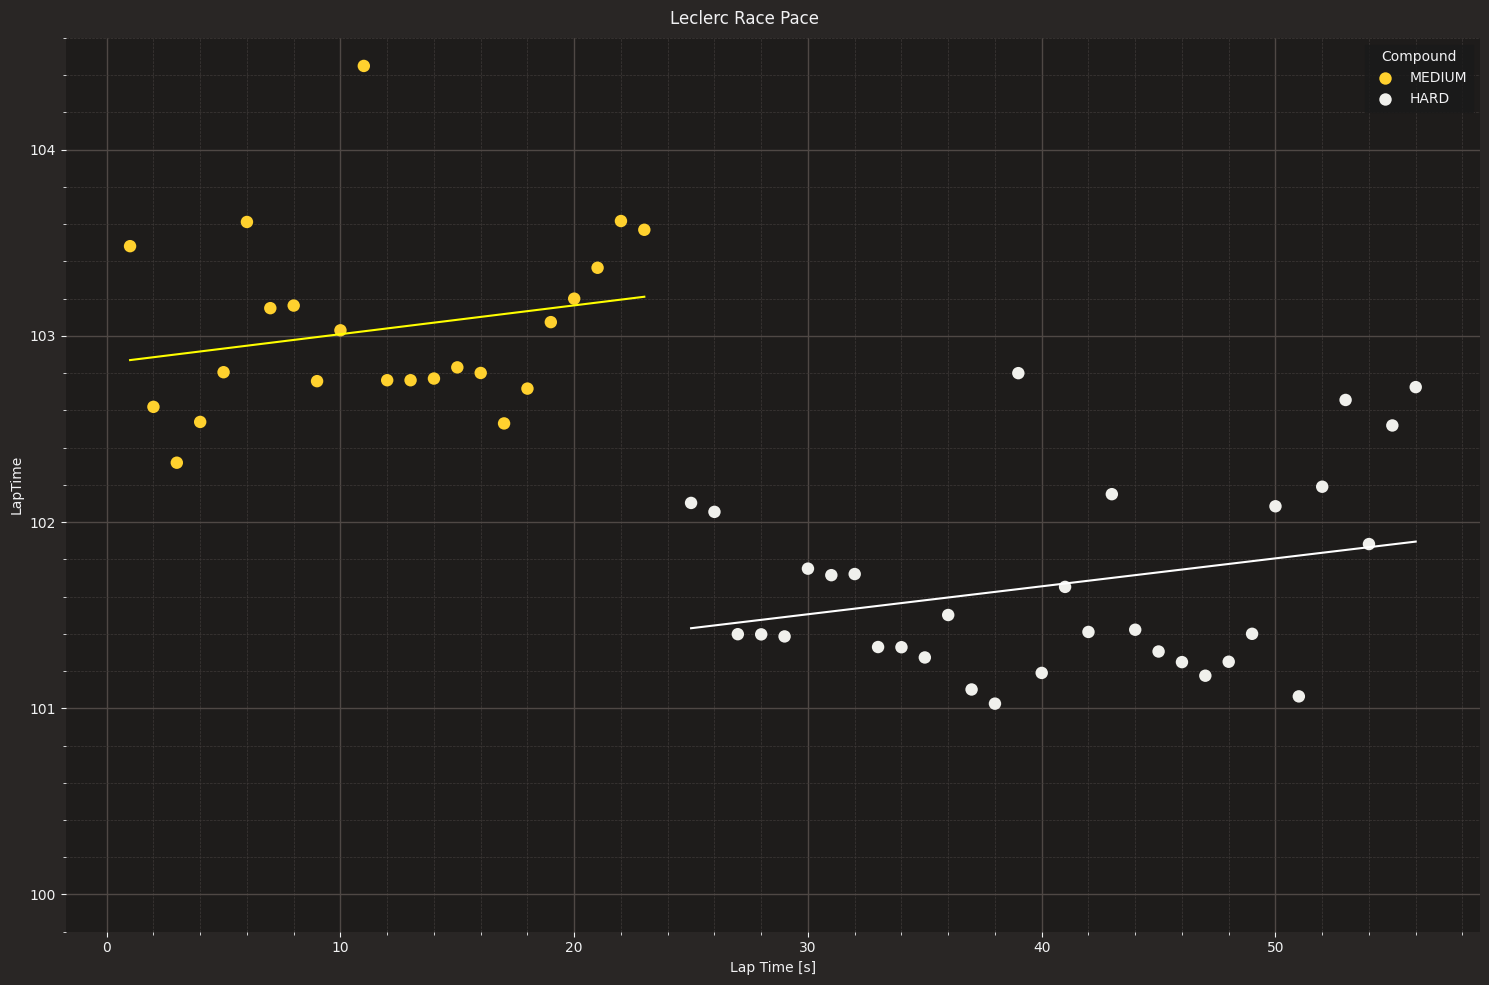

In [55]:
### Sainz ScatterPlot
lec_laps = R.laps.pick_driver("LEC").pick_quicklaps().reset_index()
lec_laps['LapTime'] = lec_laps['LapTime'].apply(lambda x: x.total_seconds())
fig, ax = plt.subplots()
sns.scatterplot(data=lec_laps,
                x="LapNumber",
                y="LapTime",
                hue="Compound",
                palette=f1plt.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

from scipy import stats

L1 = lec_laps.loc[lec_laps['Stint']==1]
L2 = lec_laps.loc[lec_laps['Stint']==2]

slope, intercept, r, p, std_err = stats.linregress(L1.index, L1.LapTime)

def trend(x):
    return slope * x + intercept

line_trend_L1 = list(map(trend, L1.index))
plt.plot(L1.index + 1, line_trend_L1, color="Yellow")

slope, intercept, r, p, std_err = stats.linregress(L2.index, L2.LapTime) 
line_trend_L2 = list(map(trend, L2.index))
plt.plot(L2.index + 2, line_trend_L2, color="White")

plt.xlabel('Lap Number')
plt.xlabel('Lap Time [s]')

plt.suptitle("Leclerc Race Pace")
# Turn on major grid lines
plt.ylim(99.8, 104.6)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()



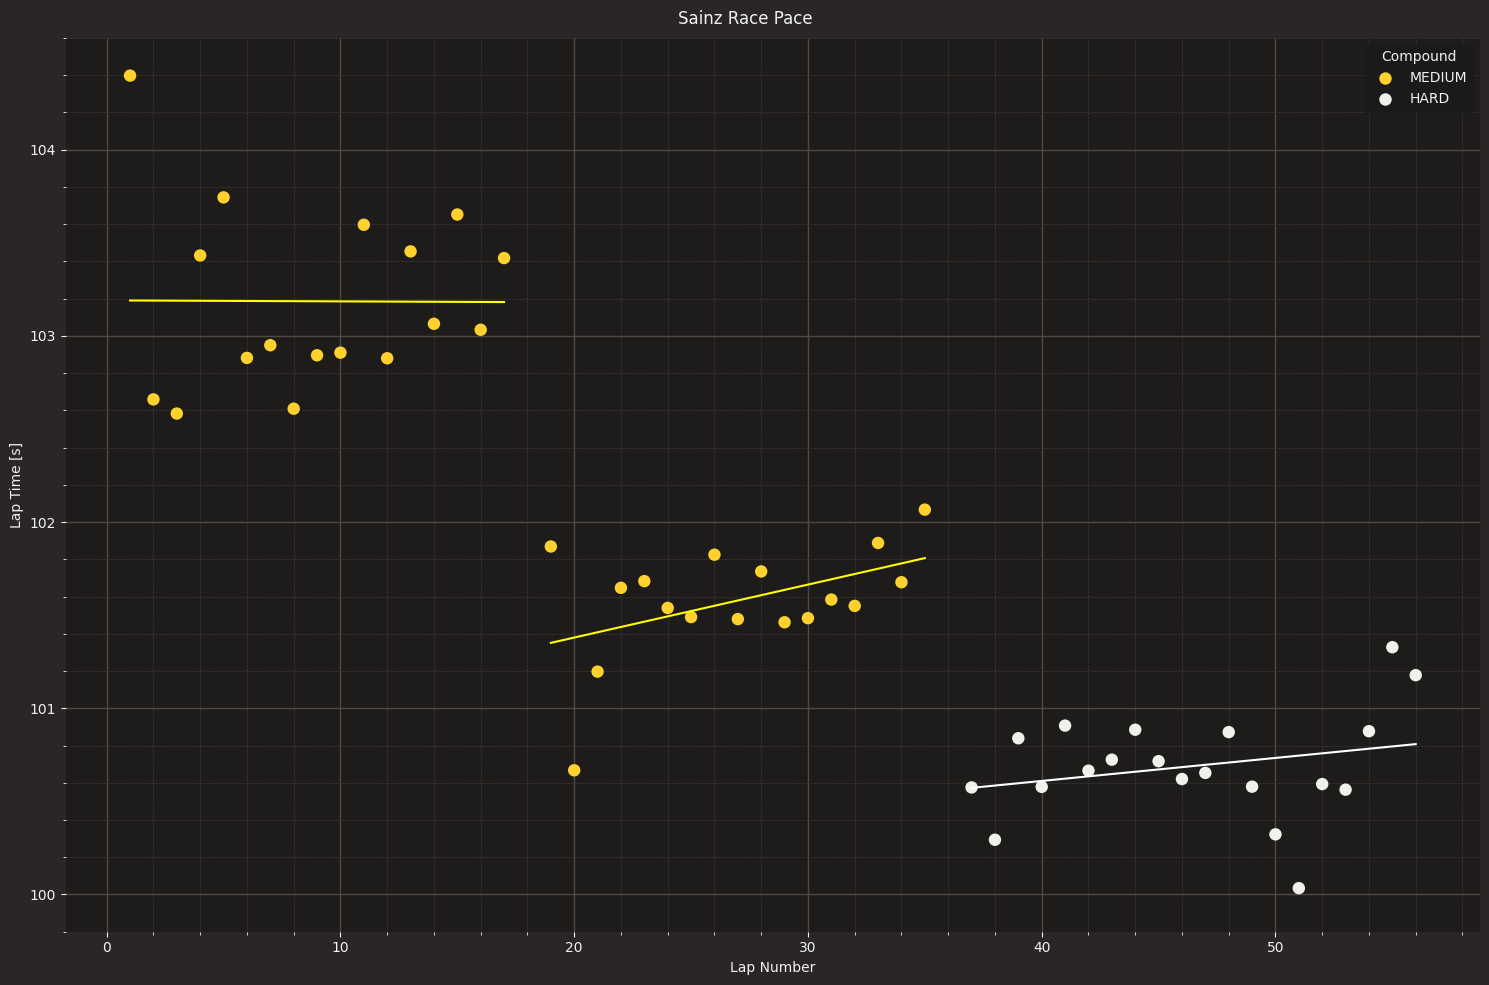

In [54]:
### Sainz ScatterPlot
sai_laps = R.laps.pick_driver("SAI").pick_quicklaps().reset_index()
sai_laps['LapTime'] = sai_laps['LapTime'].apply(lambda x: x.total_seconds())
fig, ax = plt.subplots()
sns.scatterplot(data=sai_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=f1plt.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')

S1 = sai_laps.loc[sai_laps['Stint']==1]
S2 = sai_laps.loc[sai_laps['Stint']==2]
S3 = sai_laps.loc[sai_laps['Stint']==3]

slope, intercept, r, p, std_err = stats.linregress(S1.index, S1.LapTime) 
line_trend_S1 = list(map(trend, S1.index))
plt.plot(S1.index + 1, line_trend_S1, color="Yellow")

slope, intercept, r, p, std_err = stats.linregress(S2.index, S2.LapTime) 
line_trend_S2 = list(map(trend, S2.index))
plt.plot(S2.index + 2, line_trend_S2, color="Yellow")

slope, intercept, r, p, std_err = stats.linregress(S3.index, S3.LapTime) 
line_trend_S3 = list(map(trend, S3.index))
plt.plot(S3.index + 3, line_trend_S3, color="White")

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time [s]")

# Since we are plotting time, it makes sense to invert the axis
plt.suptitle("Sainz Race Pace")
# Turn on major grid lines
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.ylim(99.8, 104.6)
plt.show()



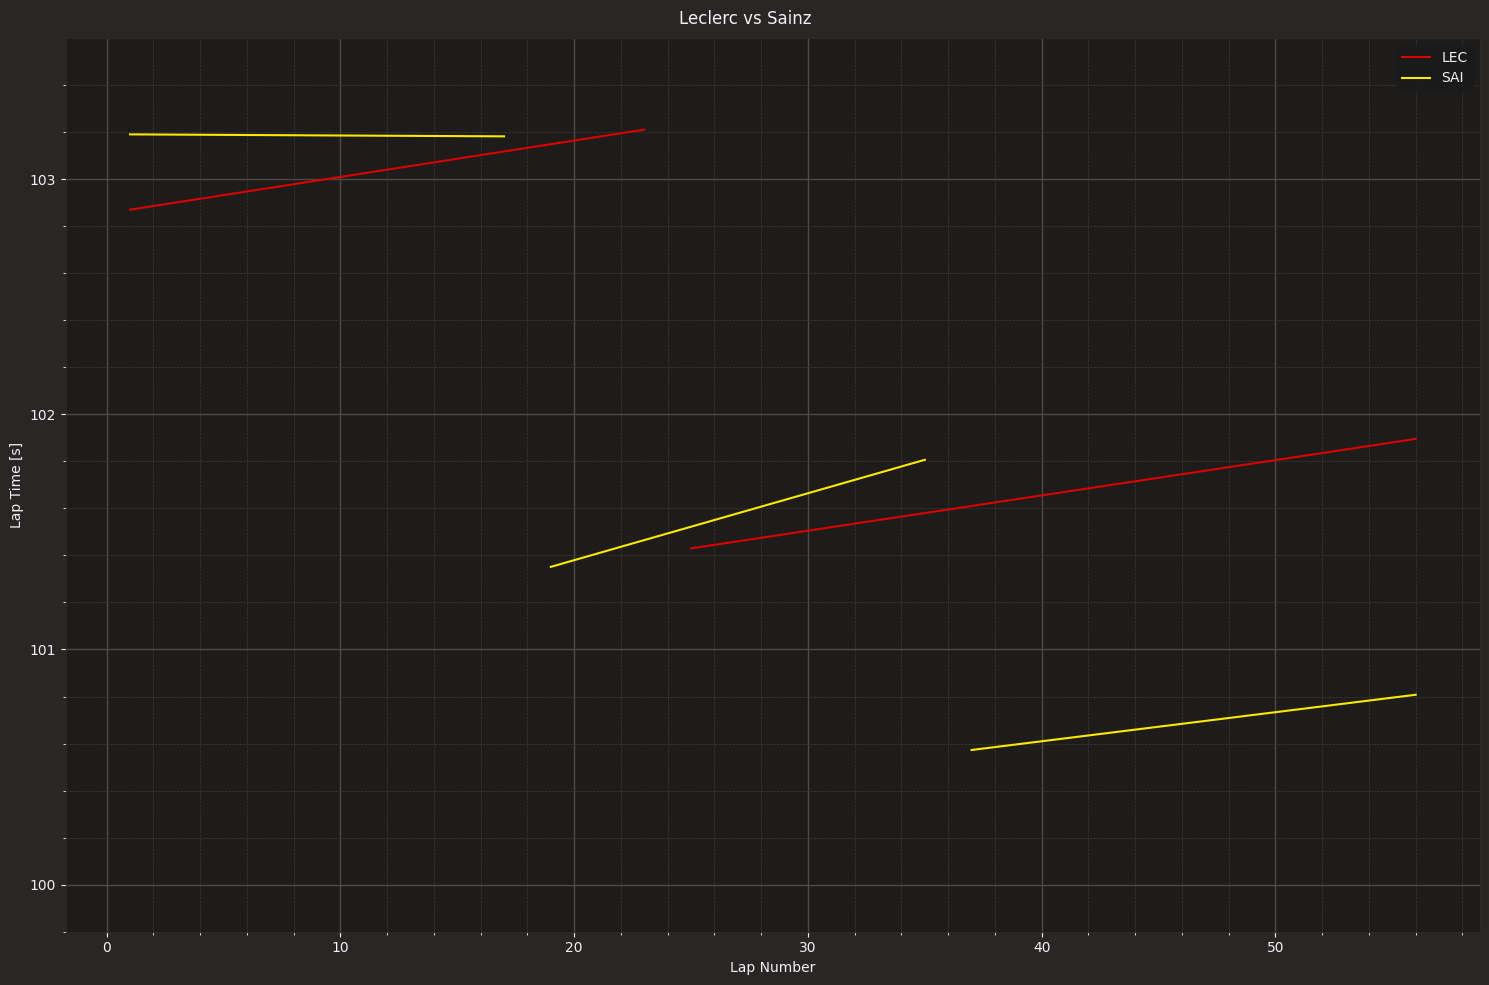

In [56]:
### Final Plot
fig, ax = plt.subplots()
plt.plot(L1.index + 1, line_trend_L1, color=f1plt.driver_color('LEC'), label = 'LEC')
plt.plot(L2.index + 2, line_trend_L2, color=f1plt.driver_color('LEC'))
plt.plot(S1.index + 1, line_trend_S1, color='#FCE903', label = 'SAI')
plt.plot(S2.index + 2, line_trend_S2, color='#FCE903')
plt.plot(S3.index + 3, line_trend_S3, color='#FCE903')
plt.ylim(99.8, 103.6)
plt.yticks([100, 101, 102, 103])
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time [s]")
plt.suptitle('Leclerc vs Sainz')
plt.tight_layout()
plt.legend()
plt.show()

### Temperature

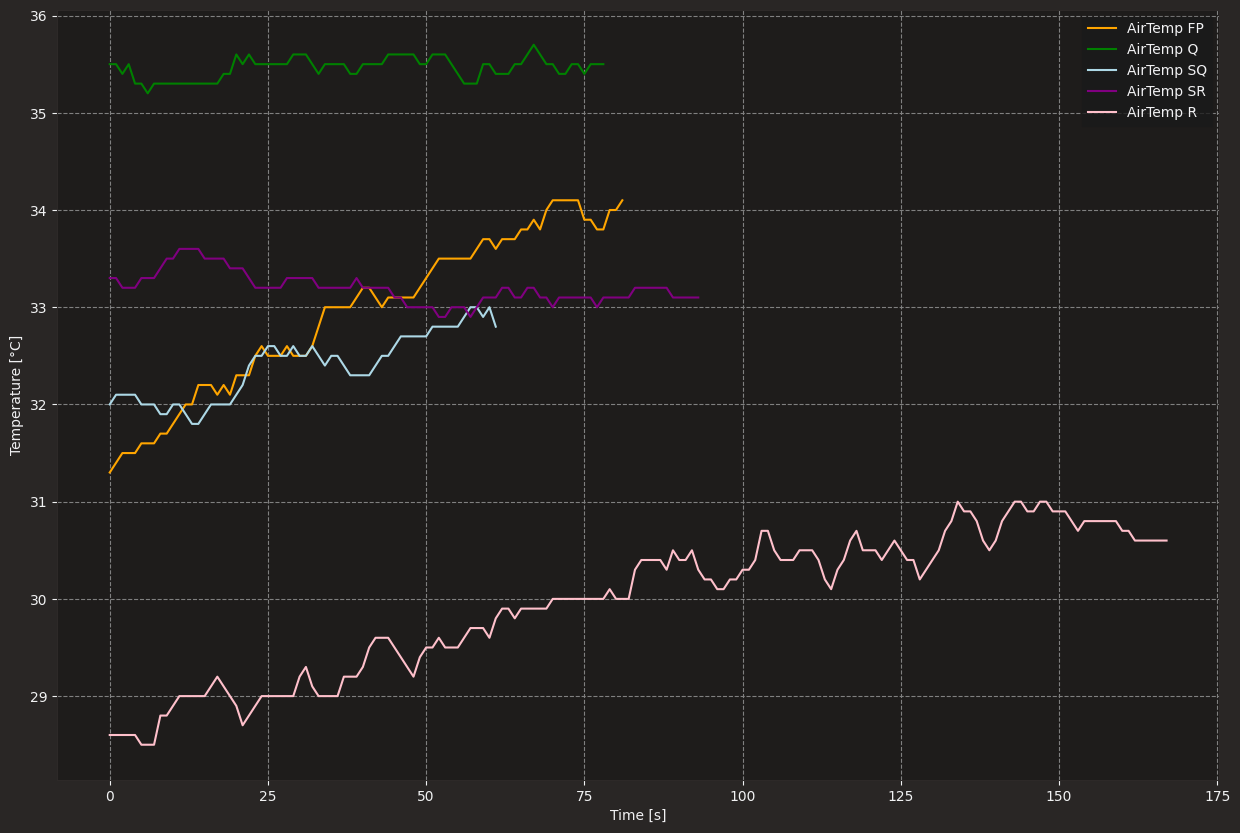

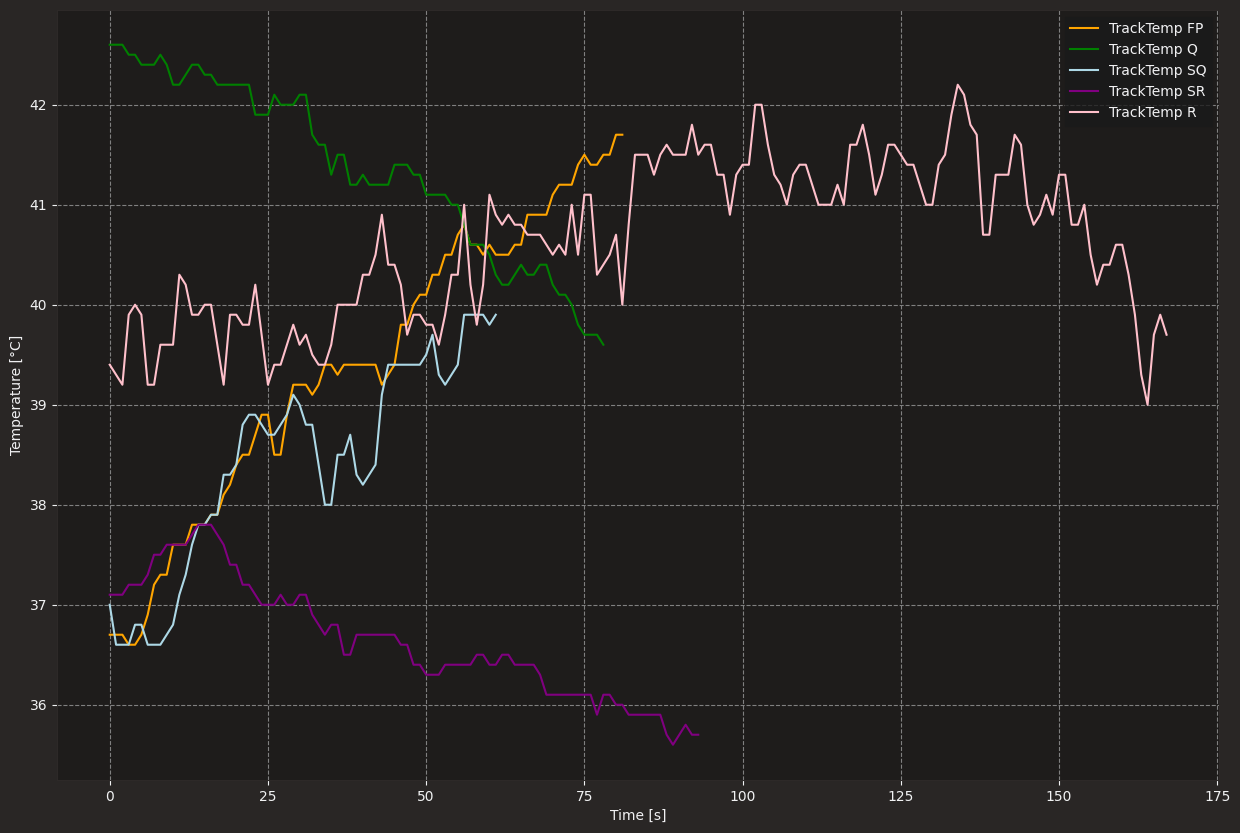

In [22]:
# Air Temperature

plt.plot(FP.weather_data['AirTemp'], color = 'orange', label = 'AirTemp FP')
plt.plot(Q.weather_data['AirTemp'], color = 'green', label = 'AirTemp Q')
plt.plot(SQ.weather_data['AirTemp'], color = 'lightblue', label = 'AirTemp SQ')
plt.plot(SR.weather_data['AirTemp'], color = 'purple', label = 'AirTemp SR')
plt.plot(R.weather_data['AirTemp'], color = 'pink', label = 'AirTemp R')
plt.legend()
plt.grid(True, which='major', linestyle='--', color='grey', zorder=-1000)
plt.ylabel('Temperature [°C]')
plt.xlabel('Time [s]')
plt.show()

# Track Temperature
plt.plot(FP.weather_data['TrackTemp'], color = 'orange', label = 'TrackTemp FP')
plt.plot(Q.weather_data['TrackTemp'], color = 'green', label = 'TrackTemp Q')
plt.plot(SQ.weather_data['TrackTemp'], color = 'lightblue', label = 'TrackTemp SQ')
plt.plot(SR.weather_data['TrackTemp'], color = 'purple', label = 'TrackTemp SR')
plt.plot(R.weather_data['TrackTemp'], color = 'pink', label = 'TrackTemp R')
plt.legend()
plt.grid(True, which='major', linestyle='--', color='grey', zorder=-1000)
plt.ylabel('Temperature [°C]')
plt.xlabel('Time [s]')
plt.show()